-----------------------------------------
organic
-----------------------------------------
-------------------------------------------------


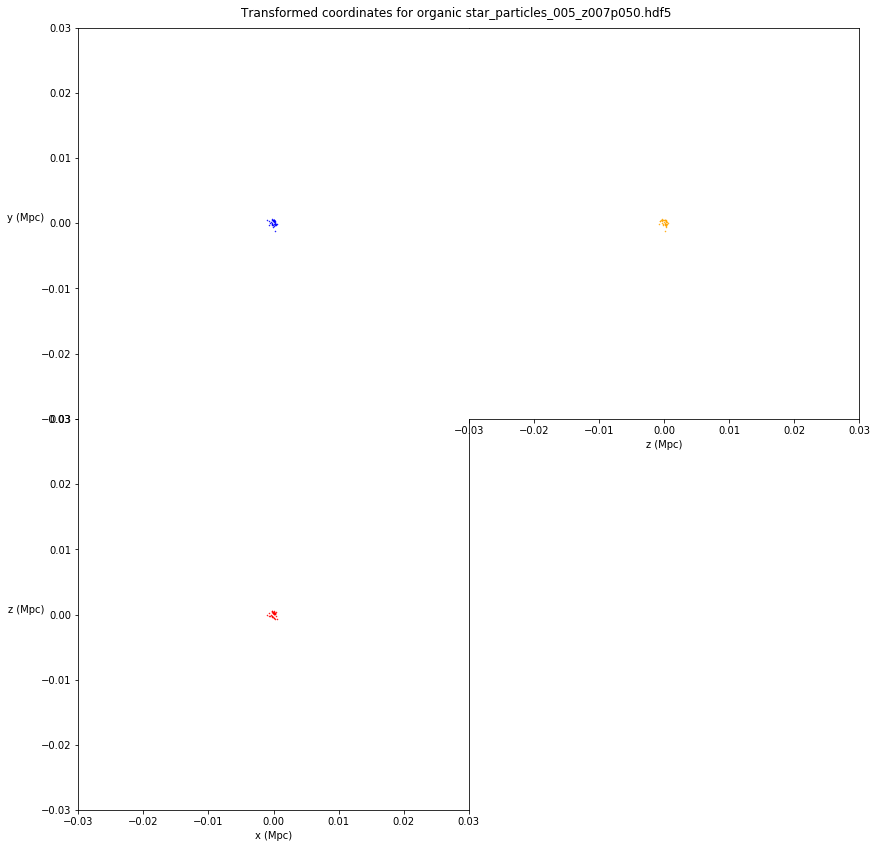

-------------------------------------------------


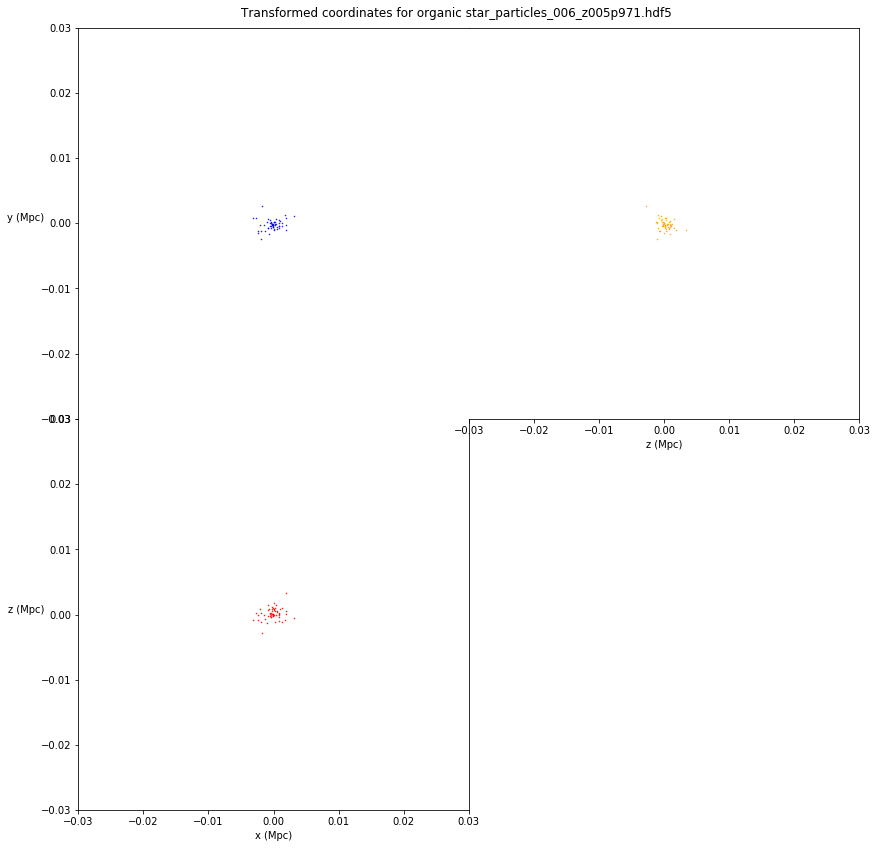

-------------------------------------------------


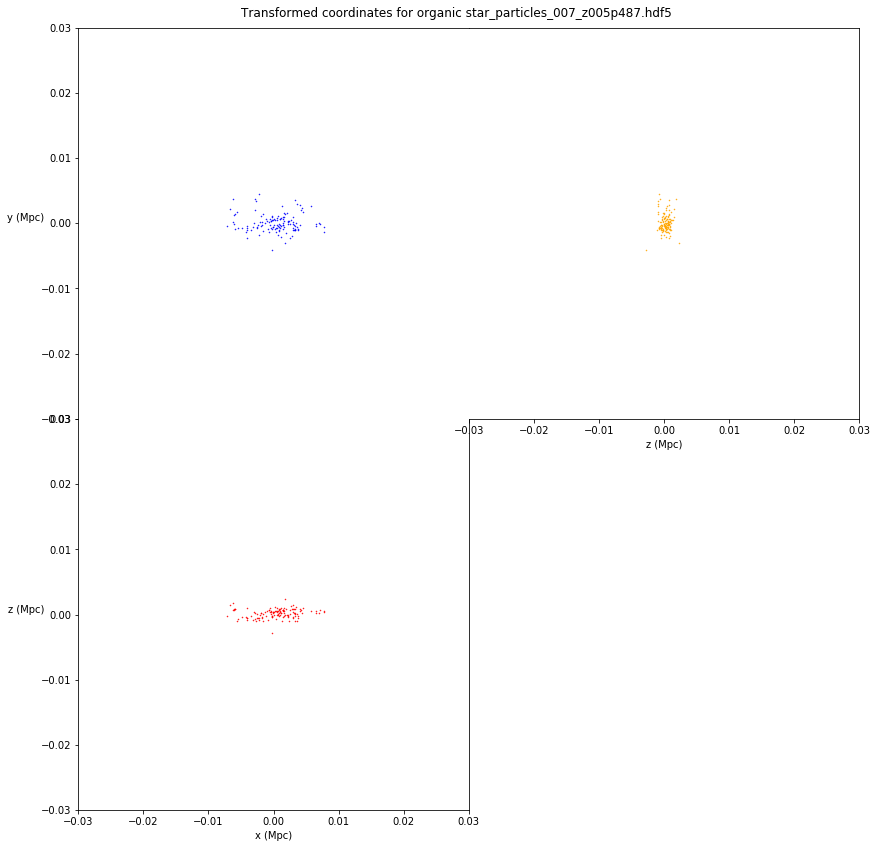

-------------------------------------------------


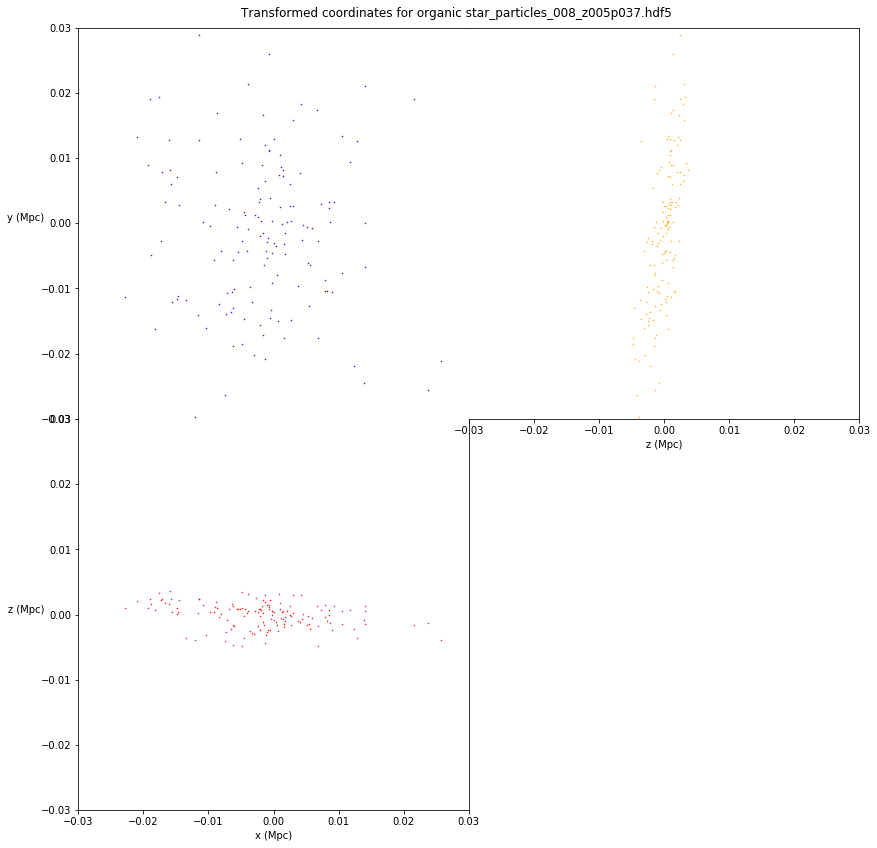

-------------------------------------------------


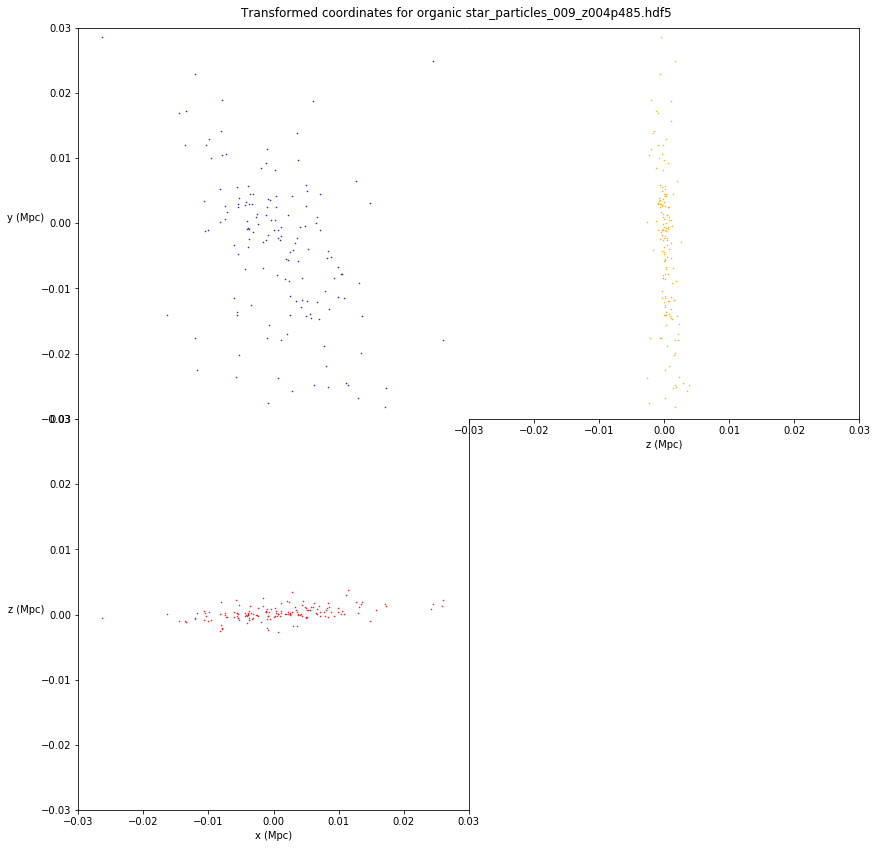

-------------------------------------------------


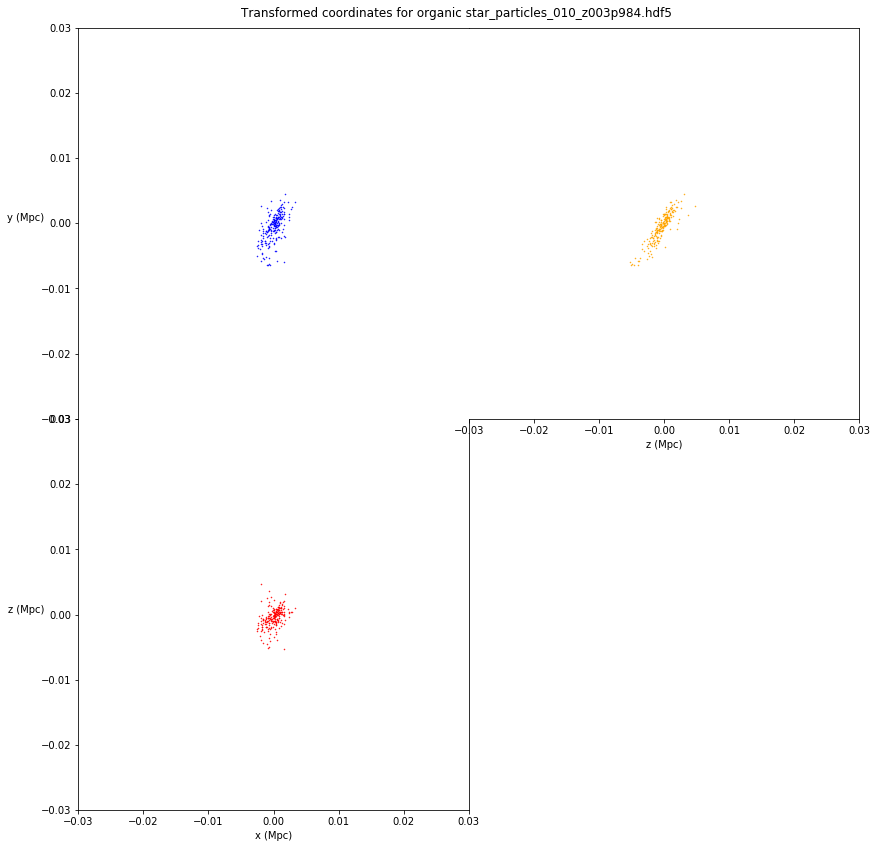

-------------------------------------------------


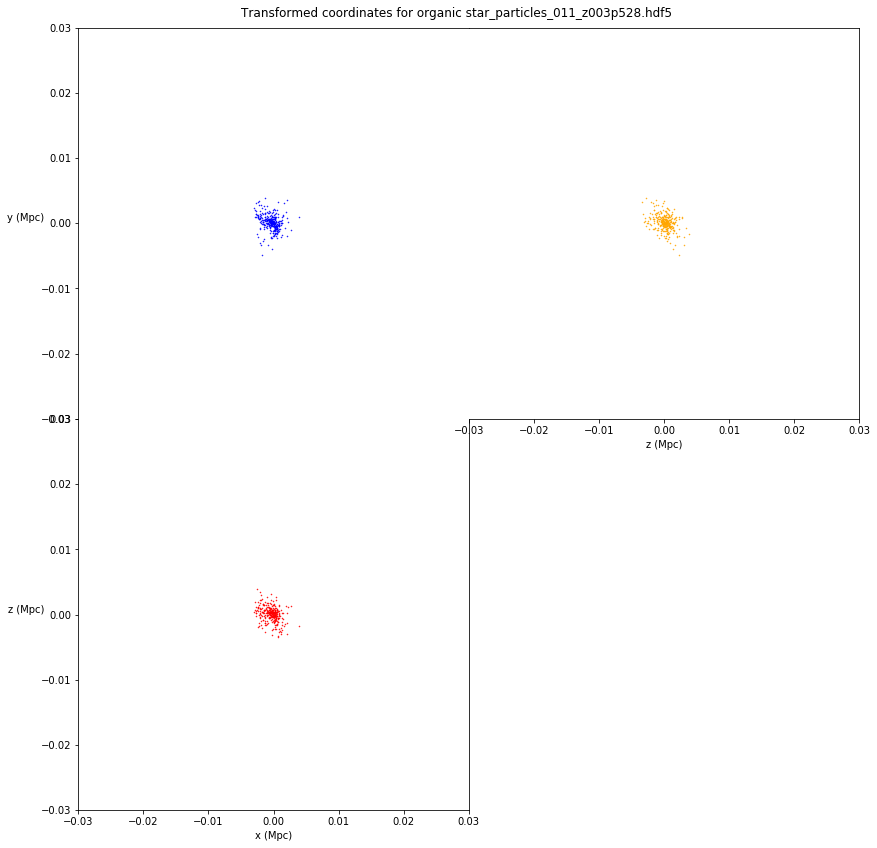

-------------------------------------------------


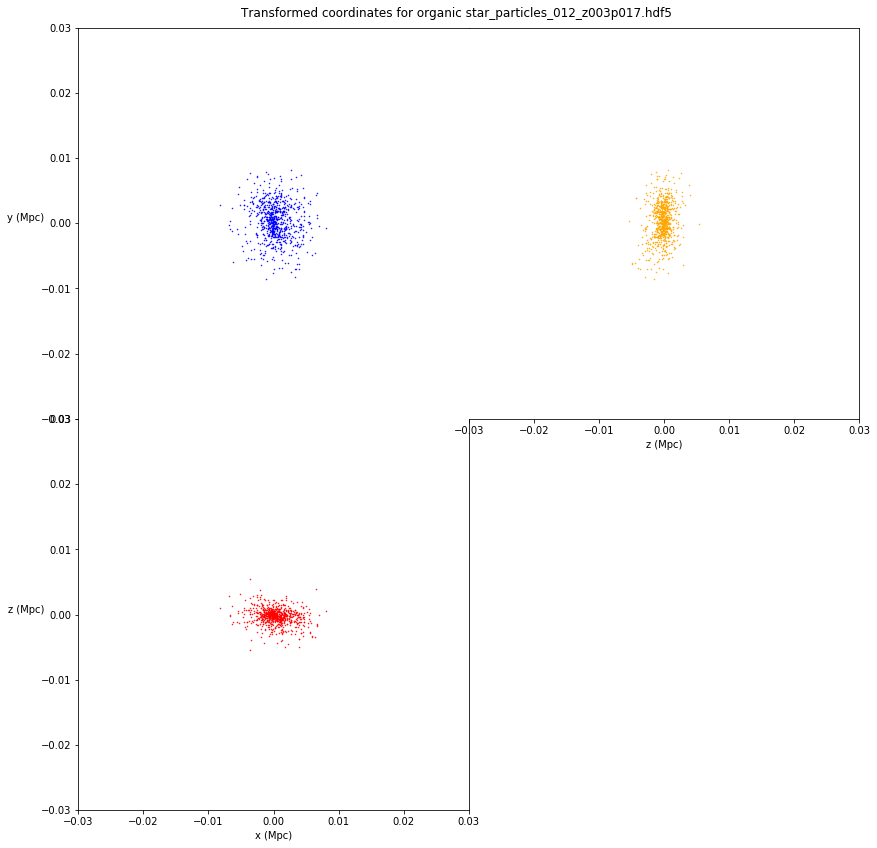

-------------------------------------------------


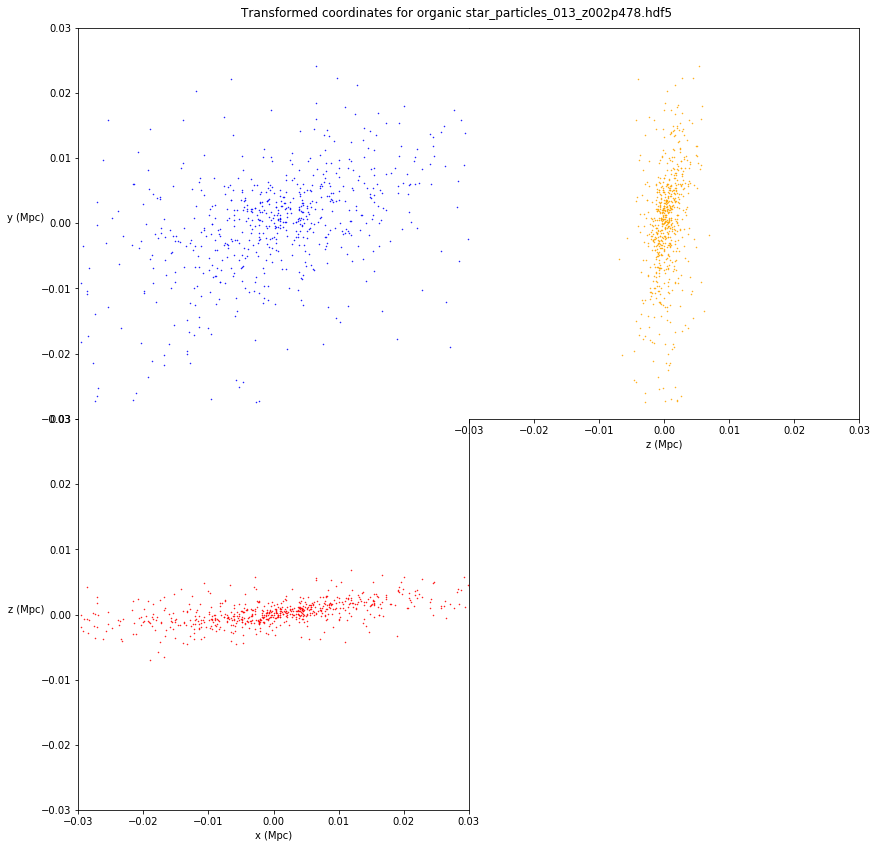

-------------------------------------------------


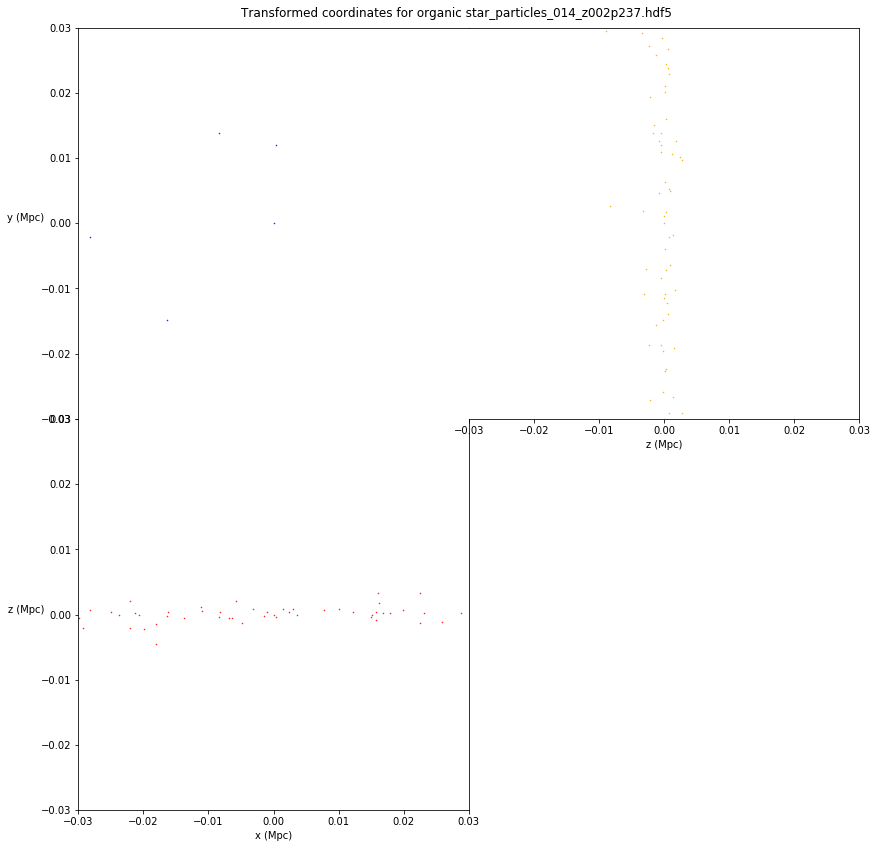

-------------------------------------------------


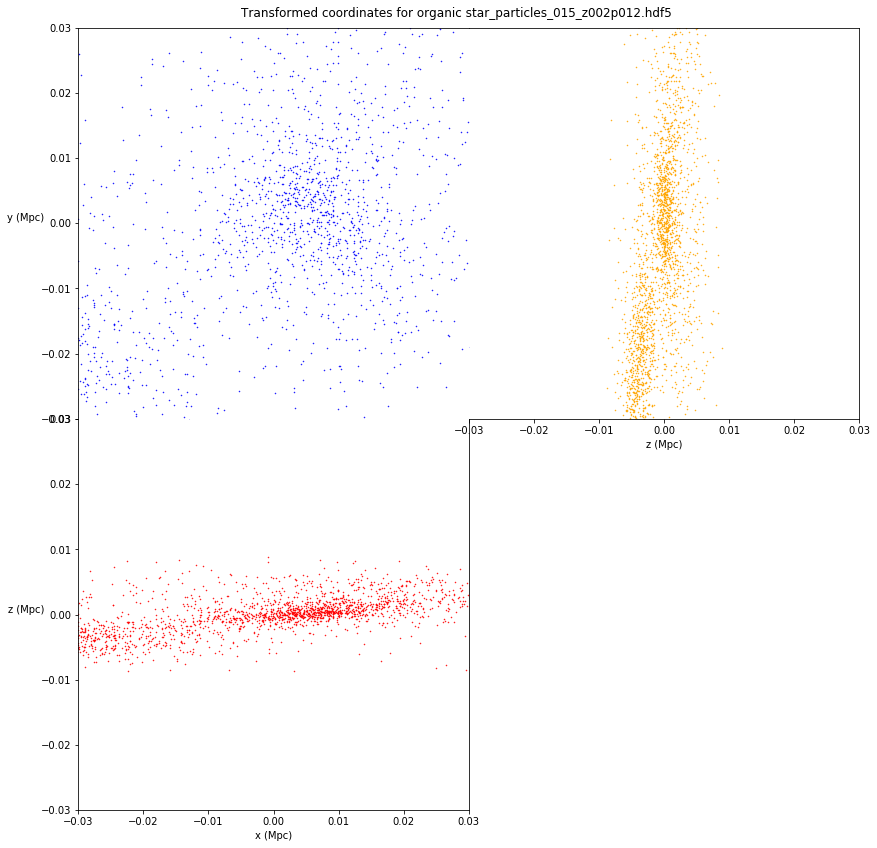

-------------------------------------------------


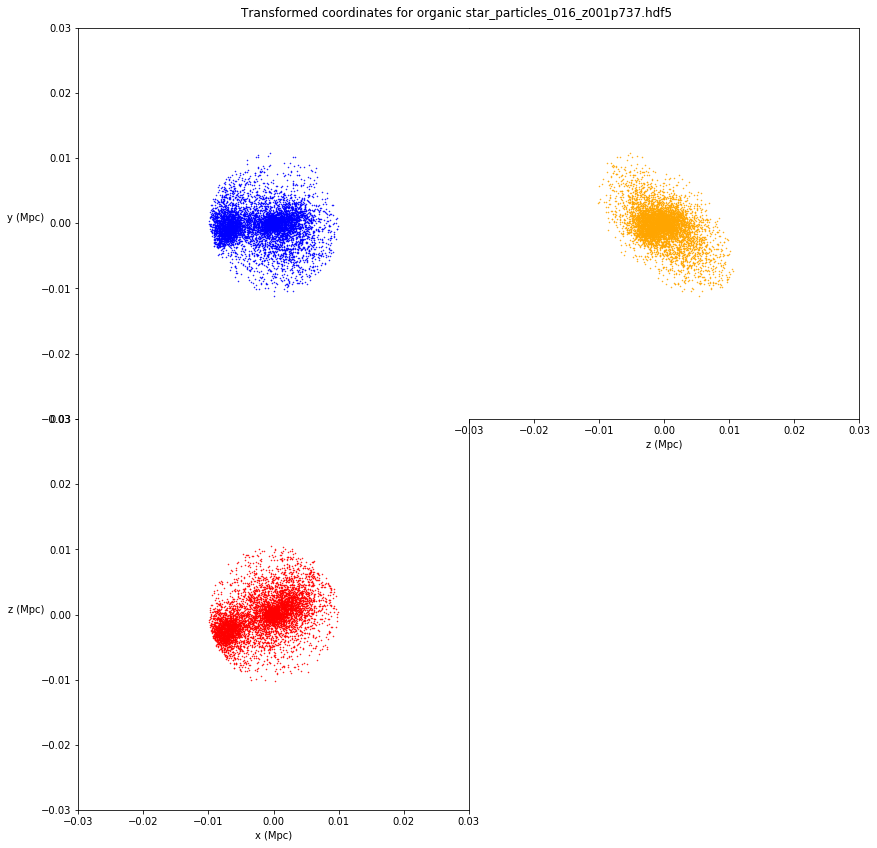

-------------------------------------------------


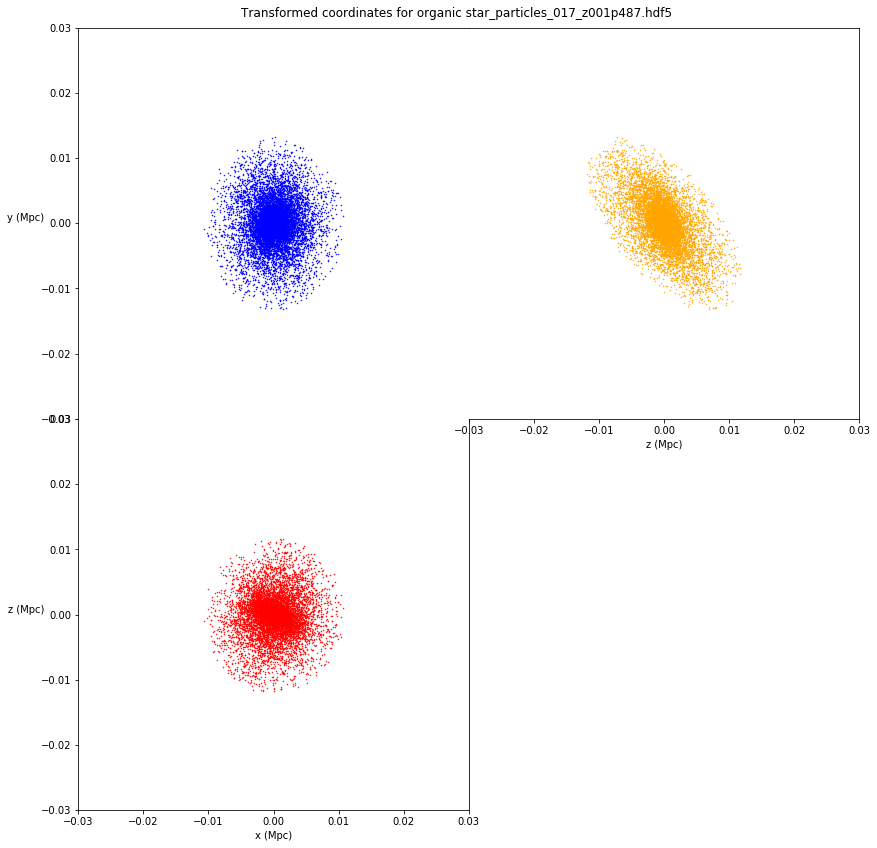

-------------------------------------------------


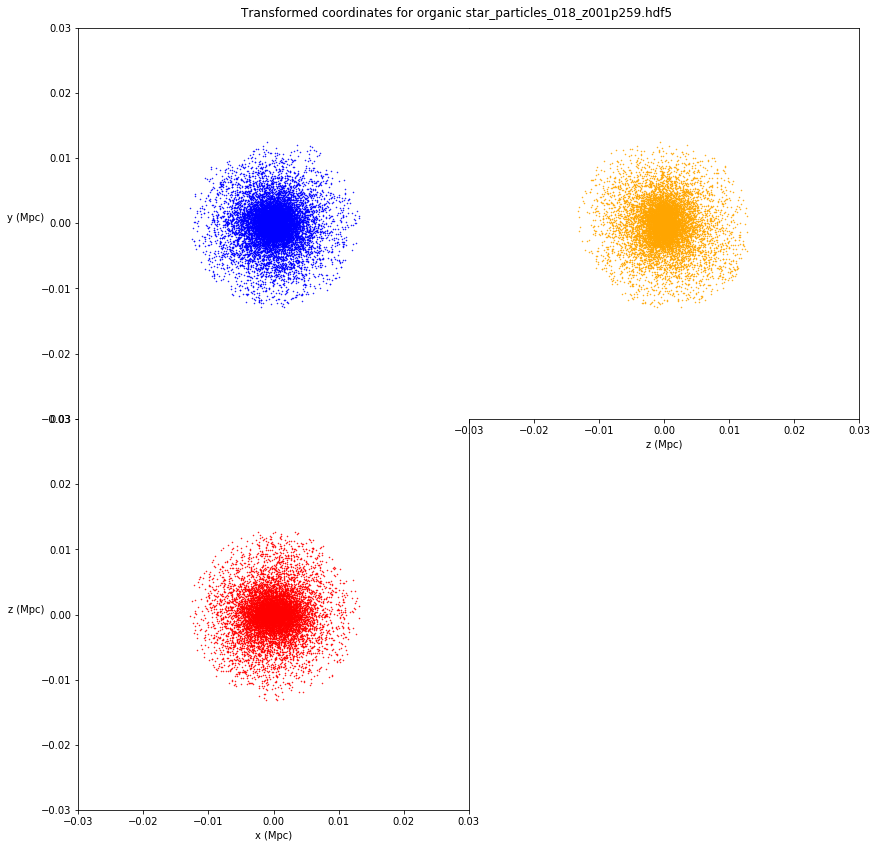

-------------------------------------------------


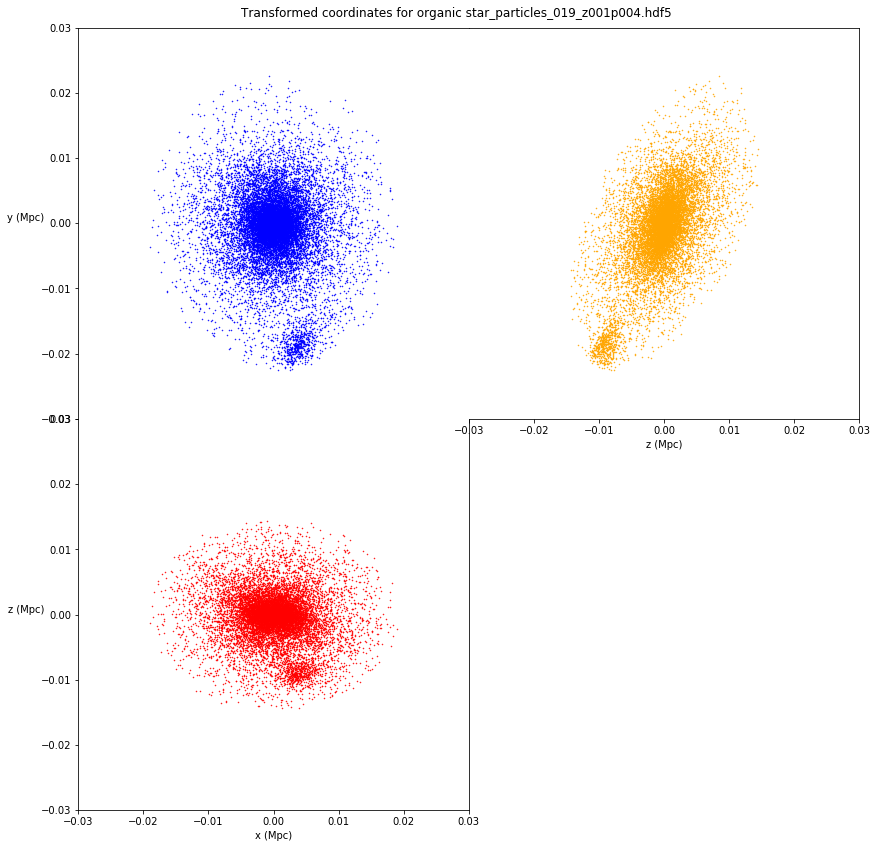

-------------------------------------------------


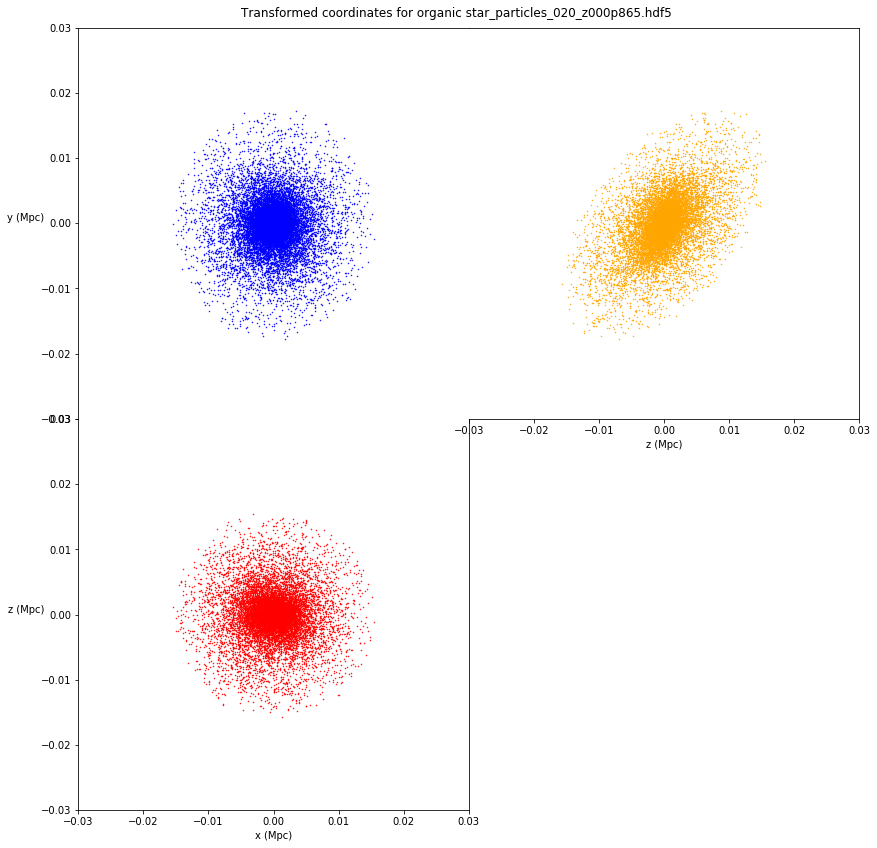

-------------------------------------------------


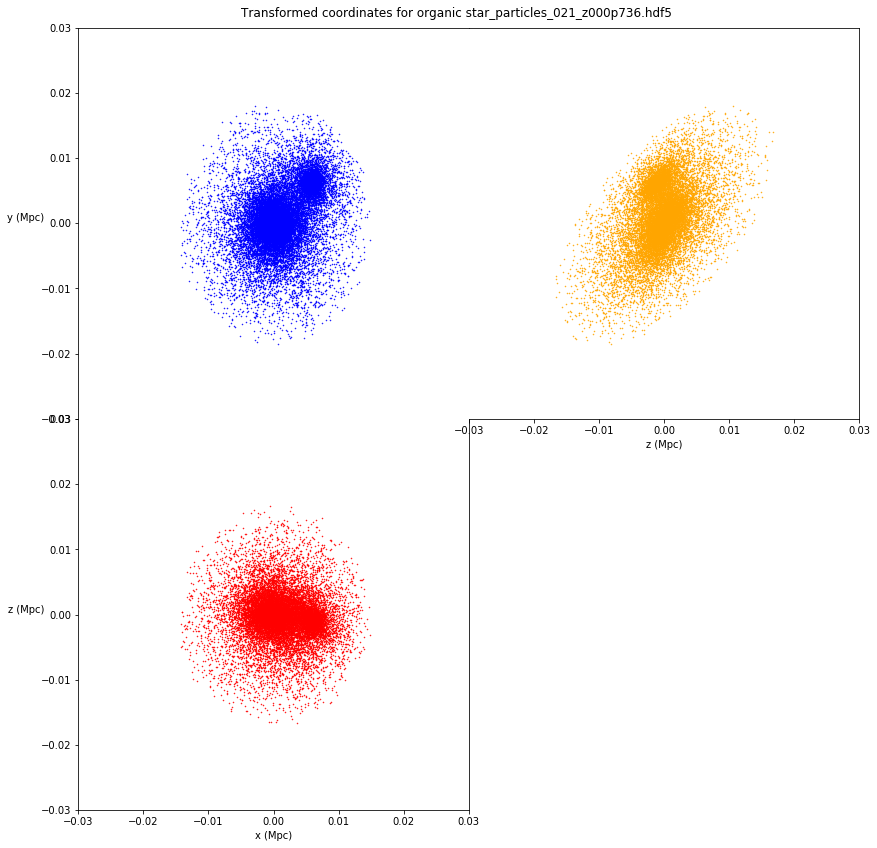

-------------------------------------------------


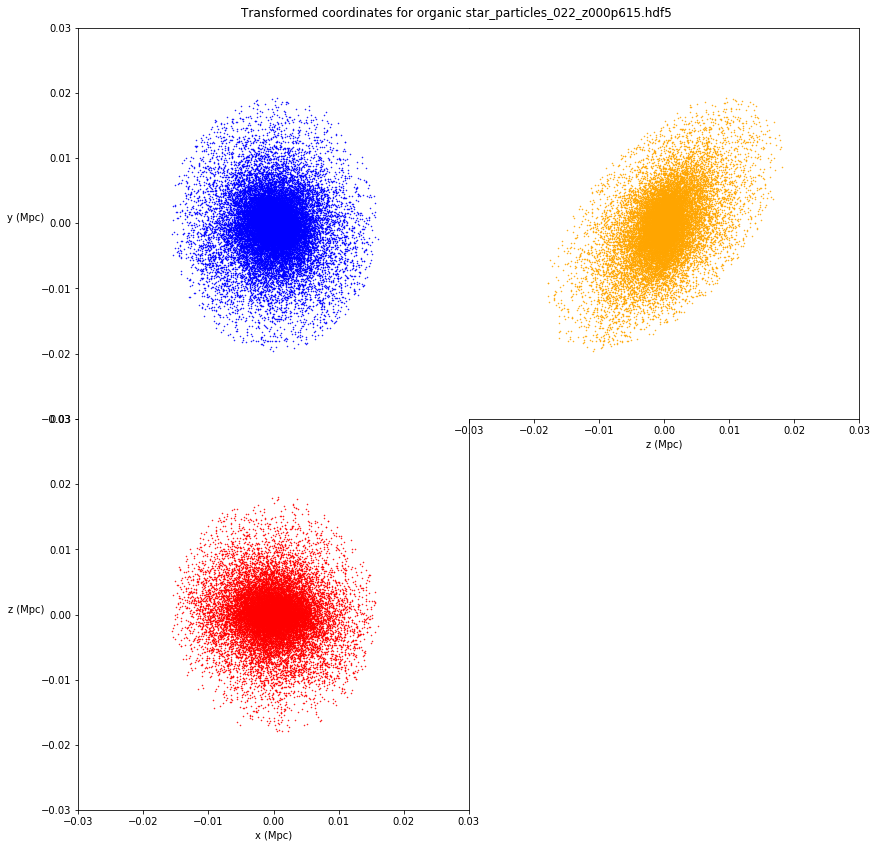

-------------------------------------------------


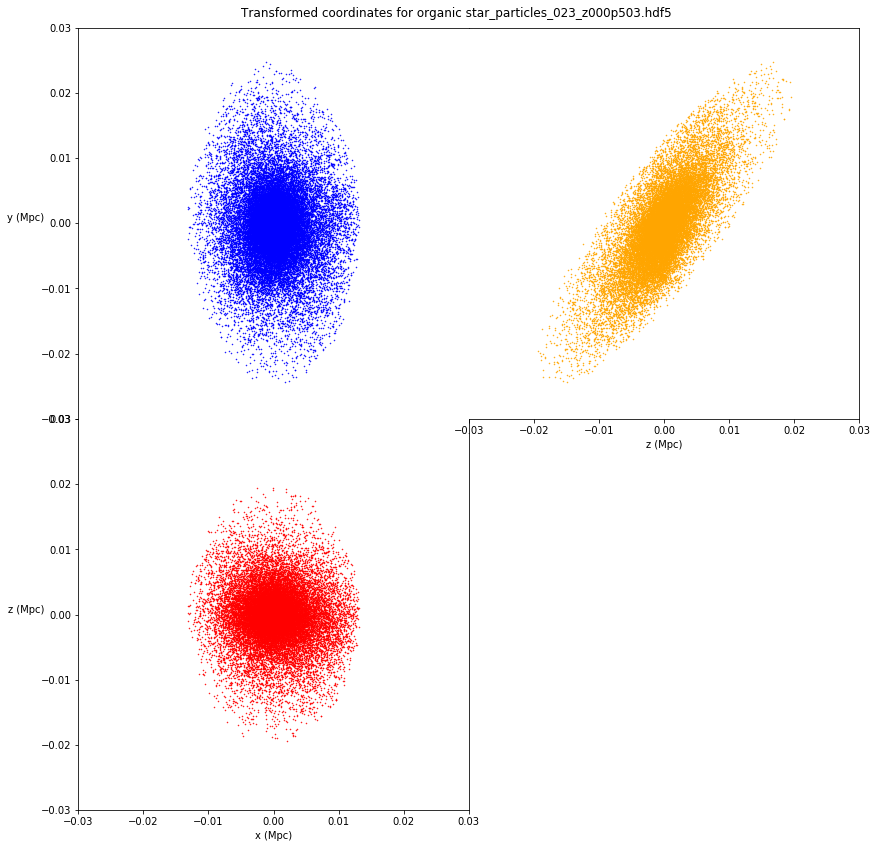

-------------------------------------------------


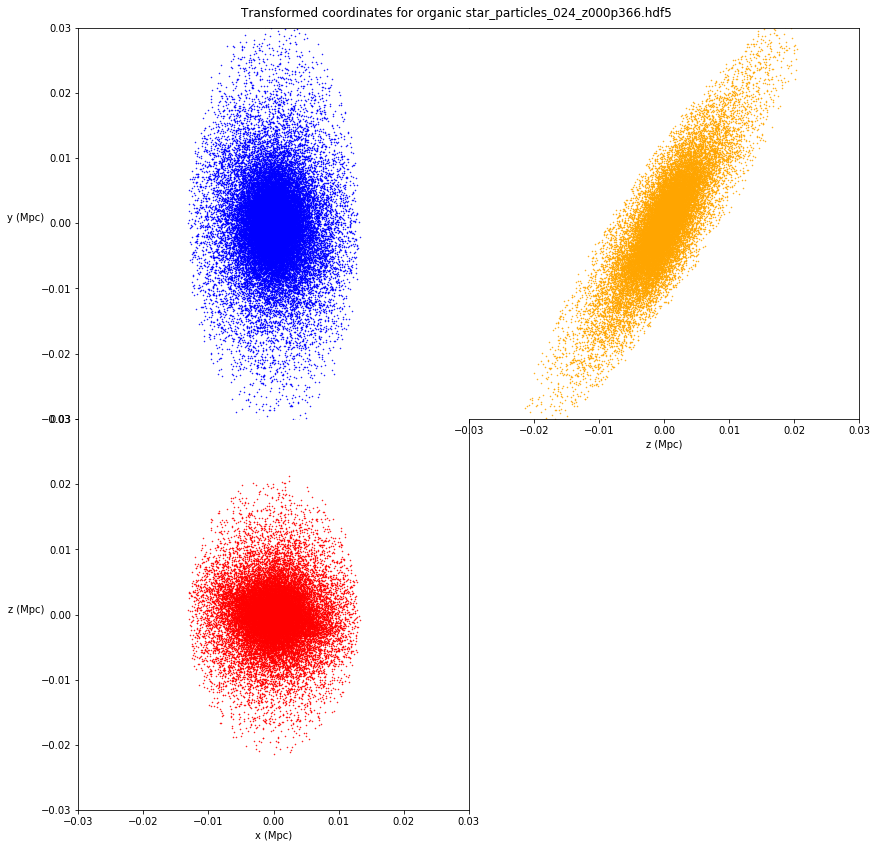

-------------------------------------------------


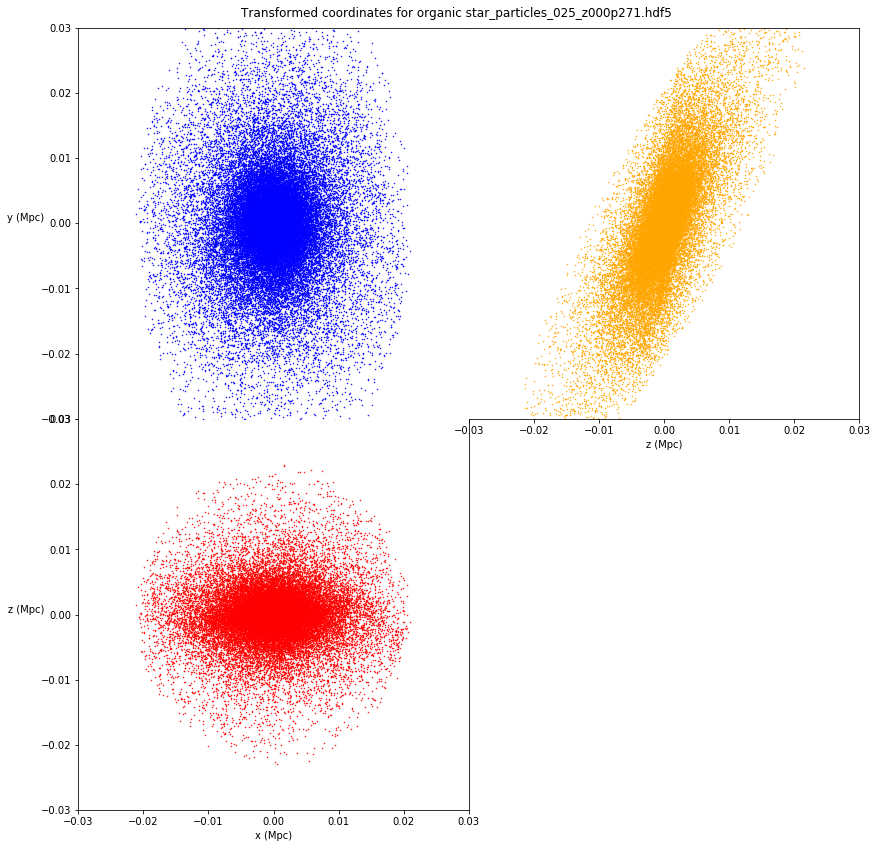

-------------------------------------------------


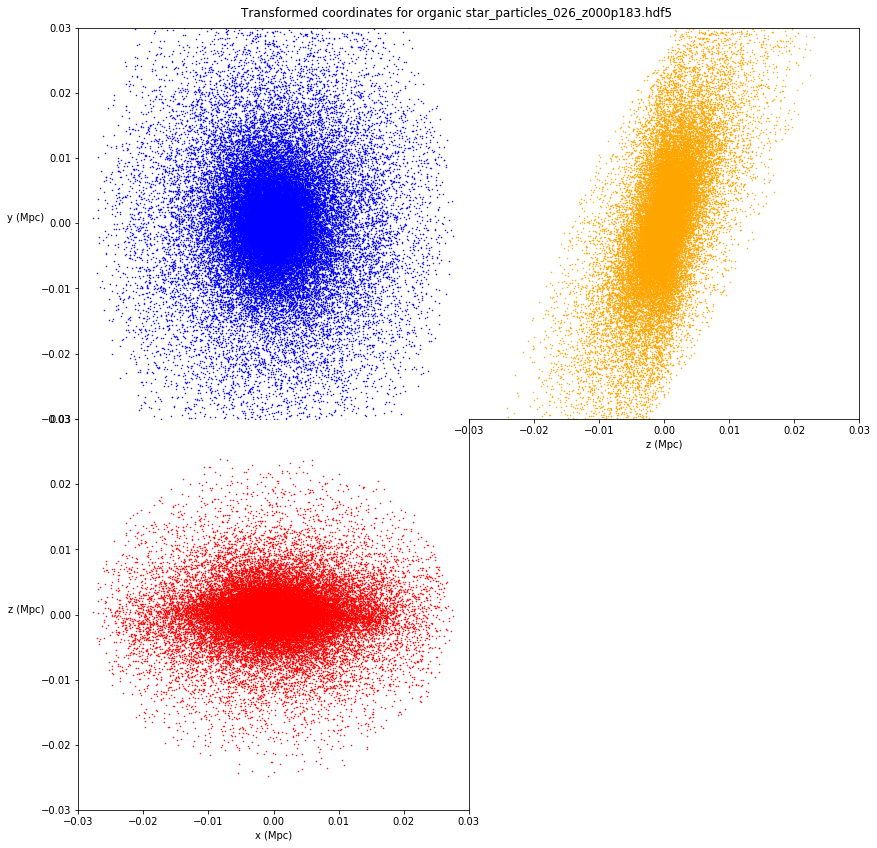

-------------------------------------------------


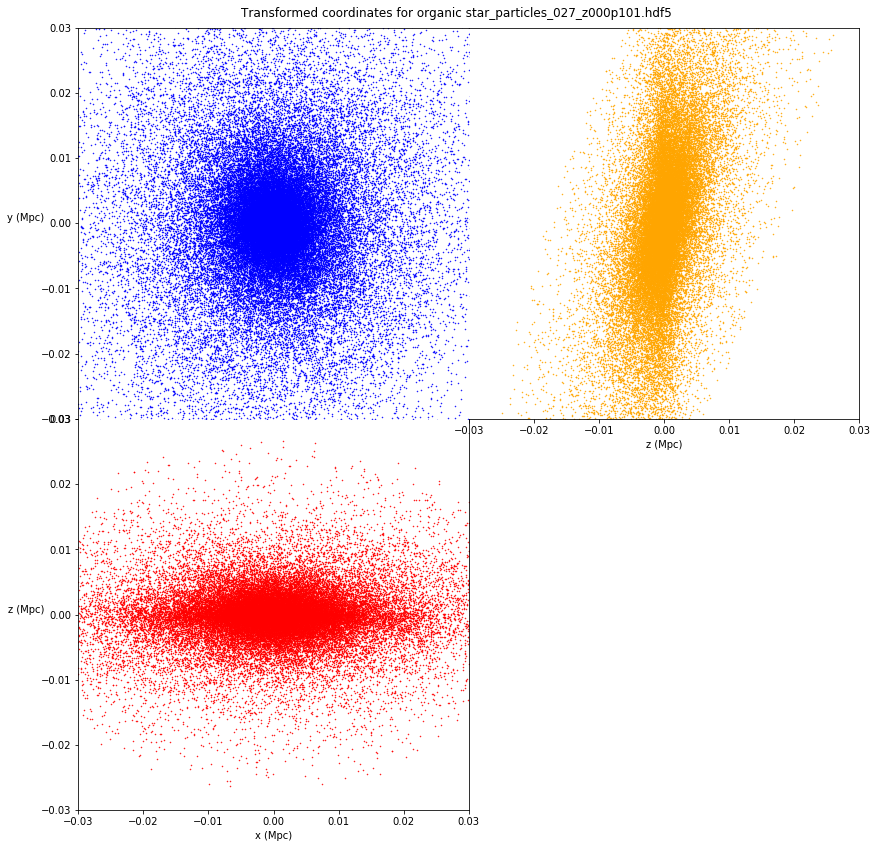

-------------------------------------------------


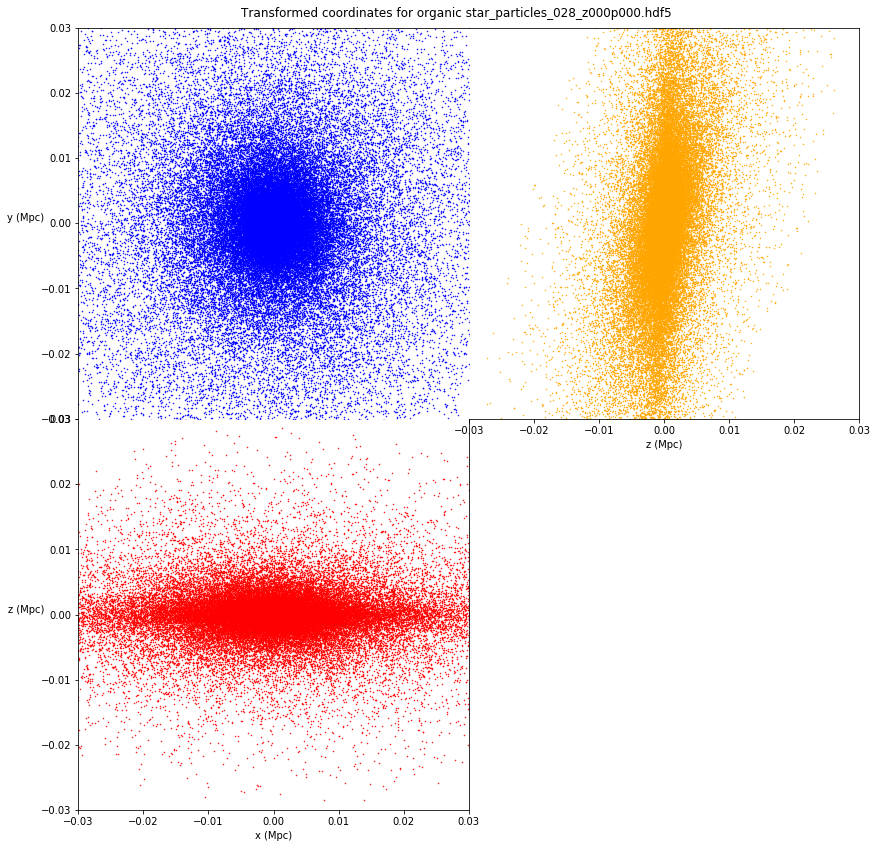

-----------------------------------------
gm_late
-----------------------------------------
-------------------------------------------------


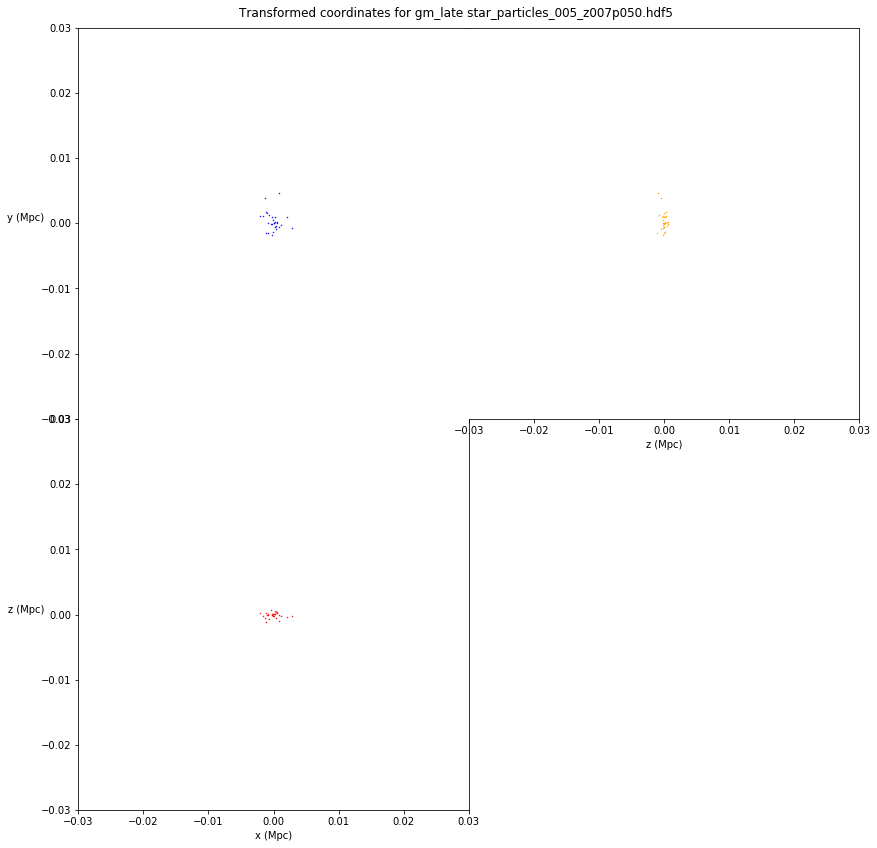

-------------------------------------------------


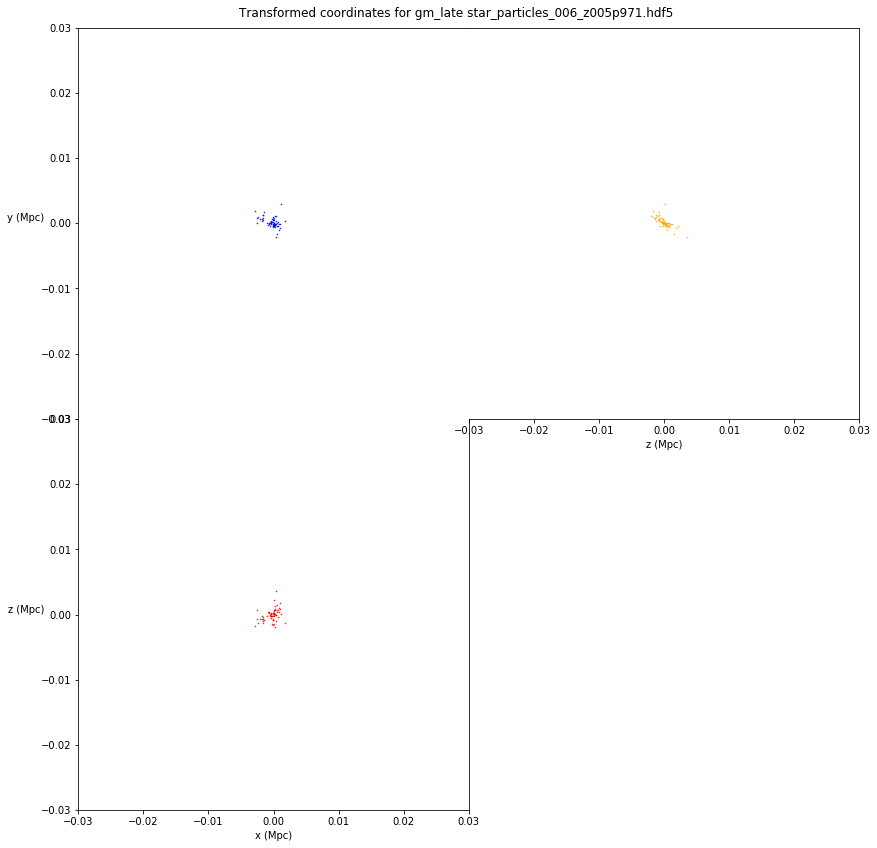

-------------------------------------------------


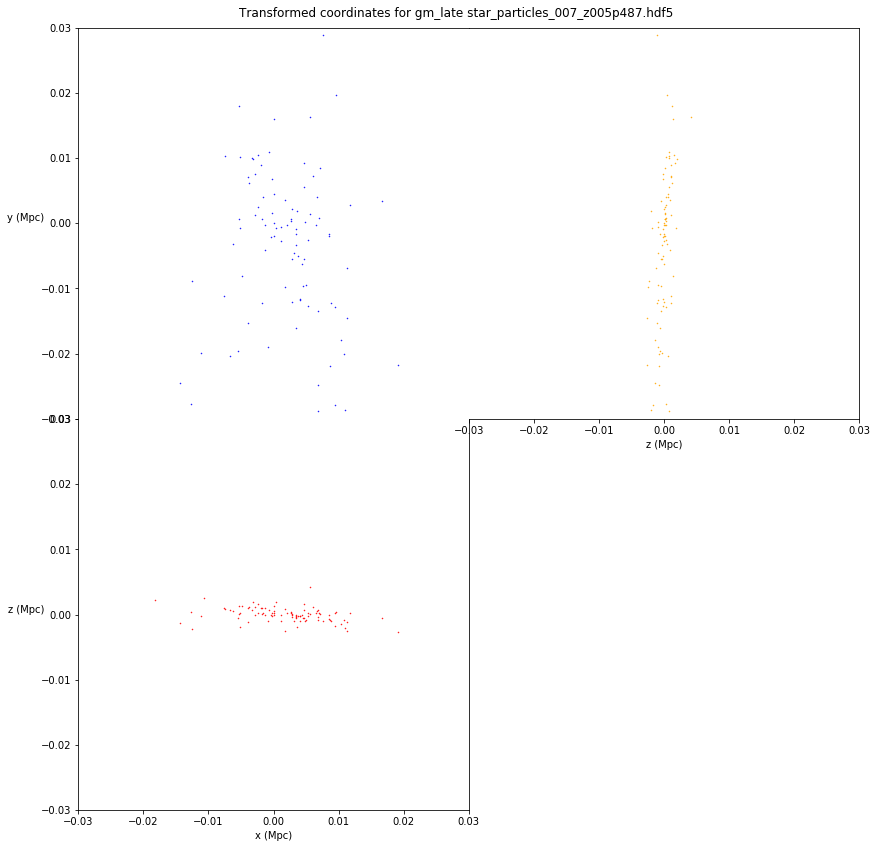

-------------------------------------------------


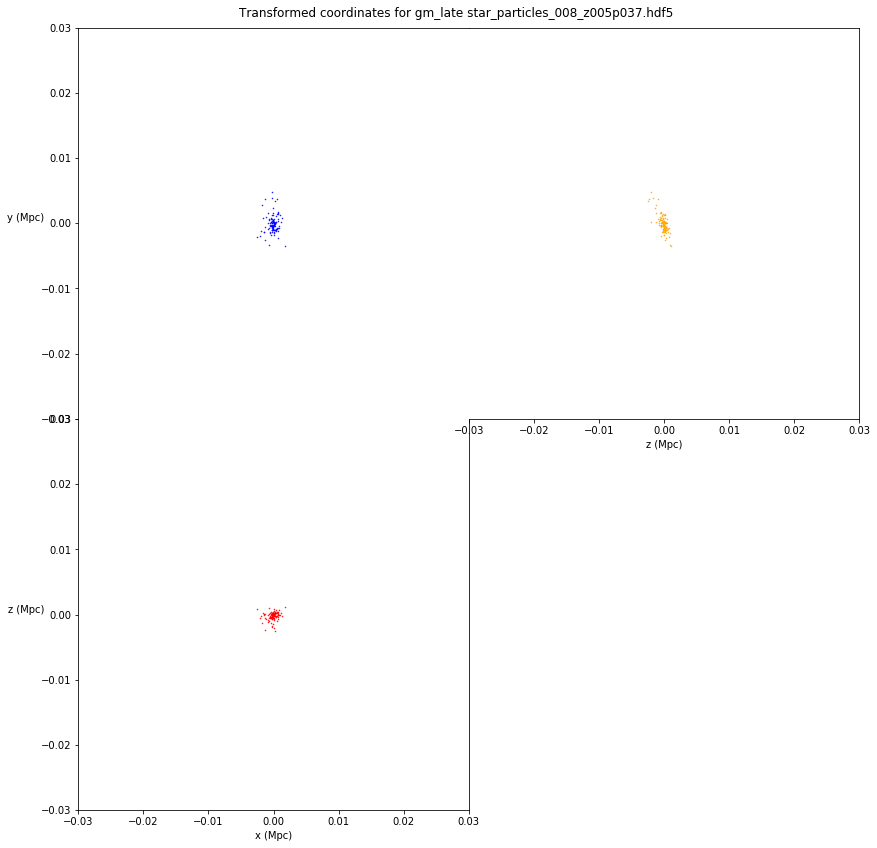

-------------------------------------------------


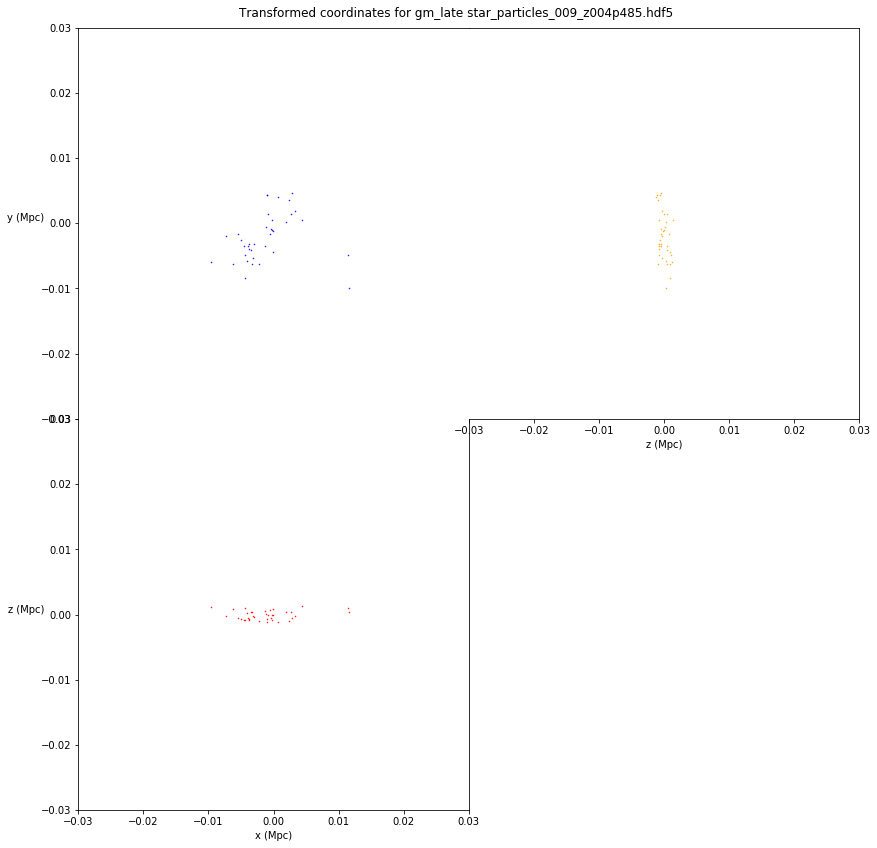

-------------------------------------------------


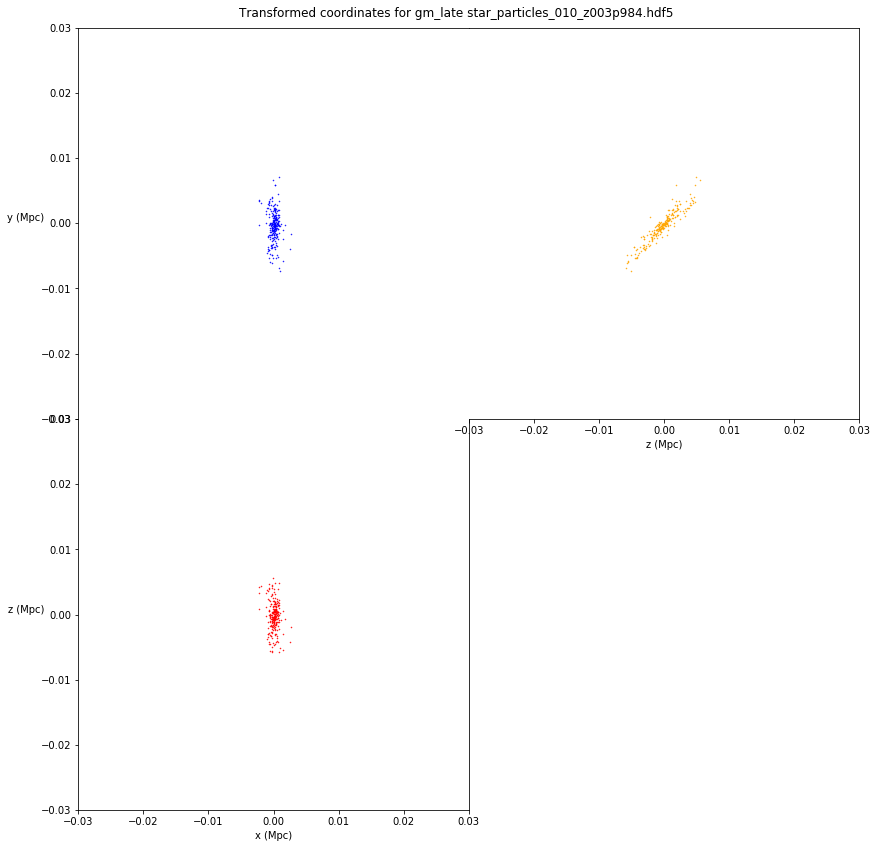

-------------------------------------------------


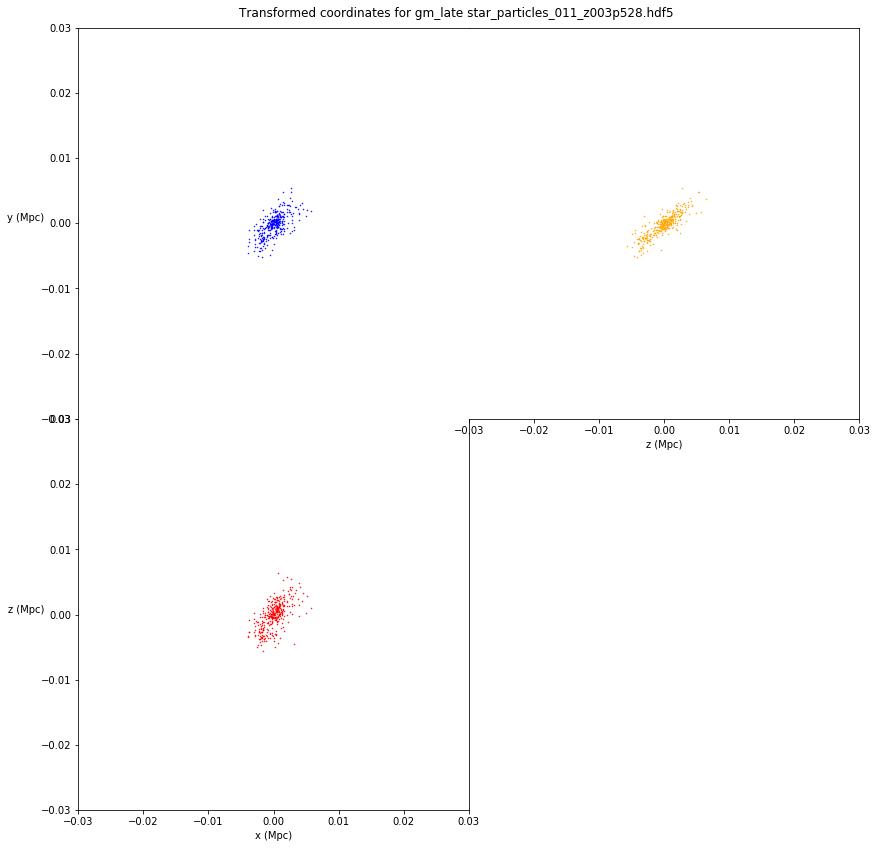

-------------------------------------------------


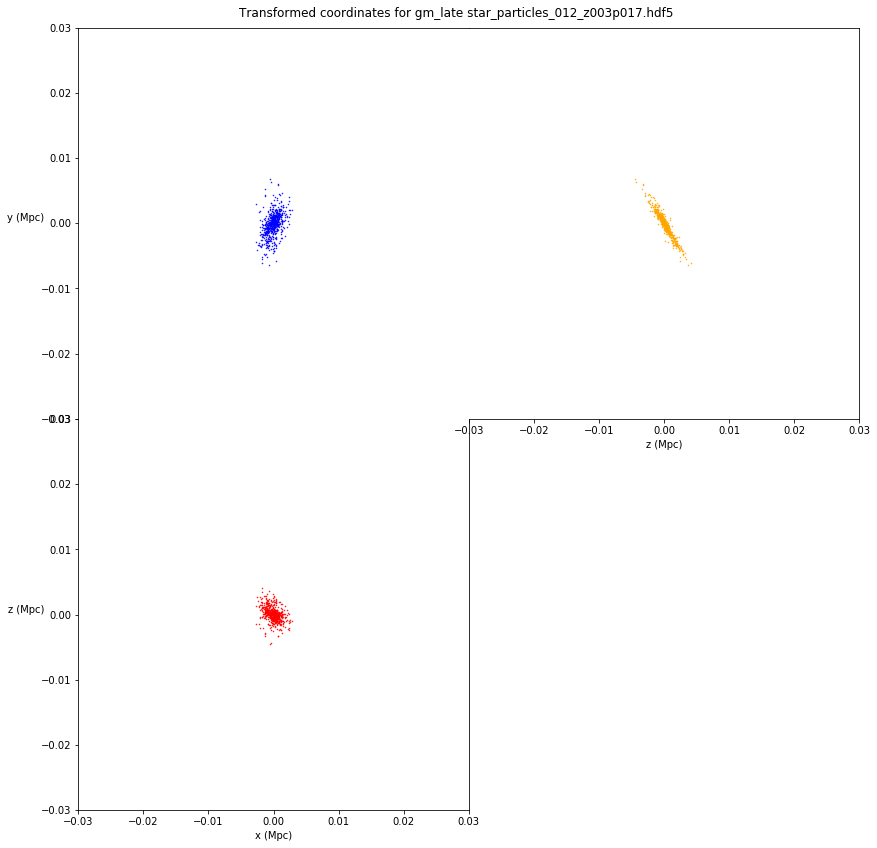

-------------------------------------------------


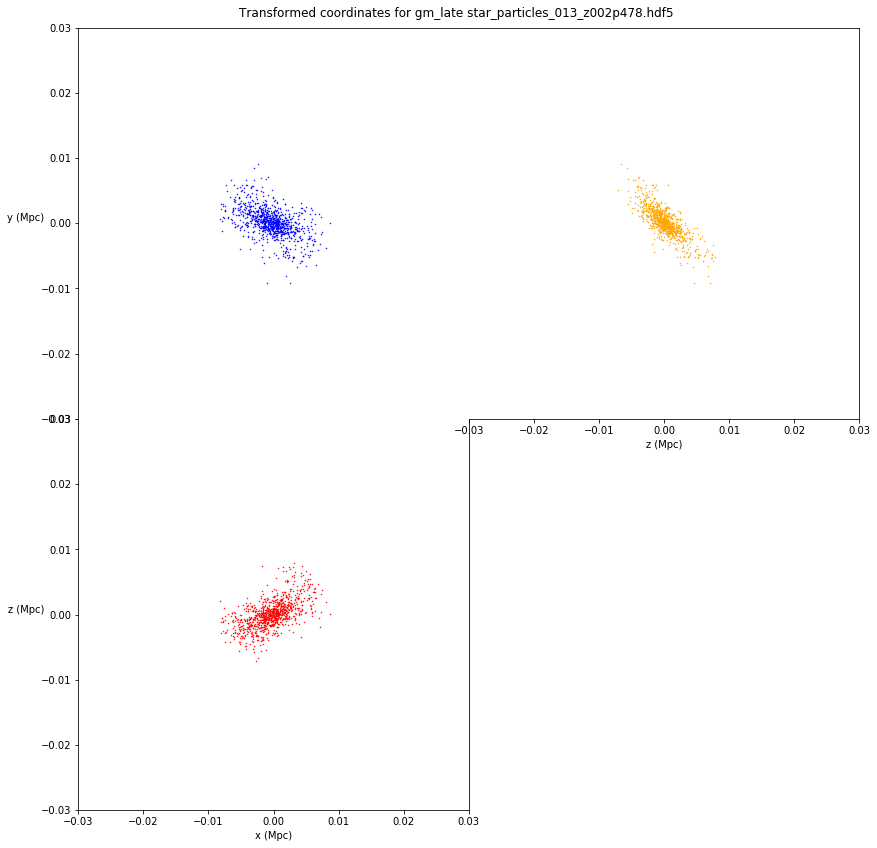

-------------------------------------------------


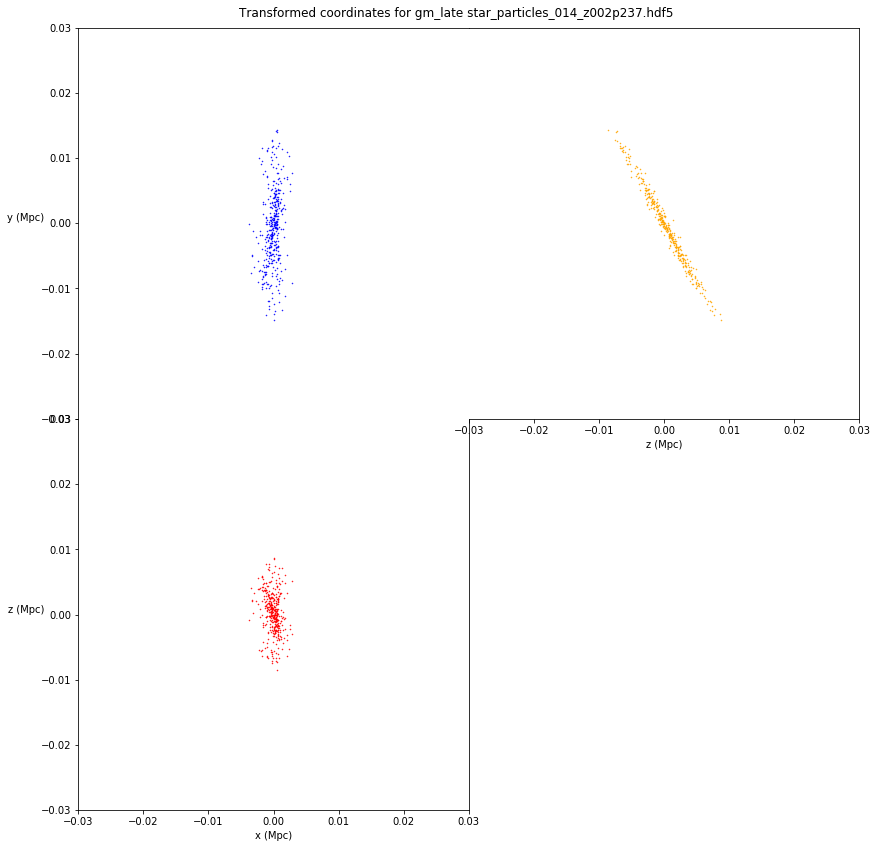

-------------------------------------------------


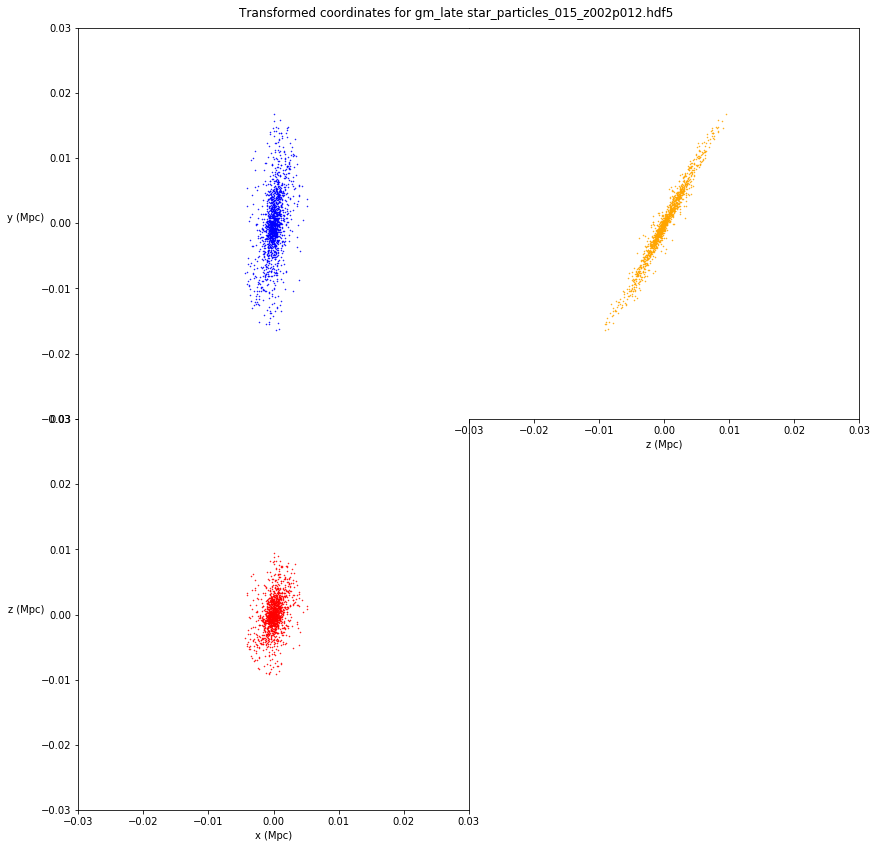

-------------------------------------------------


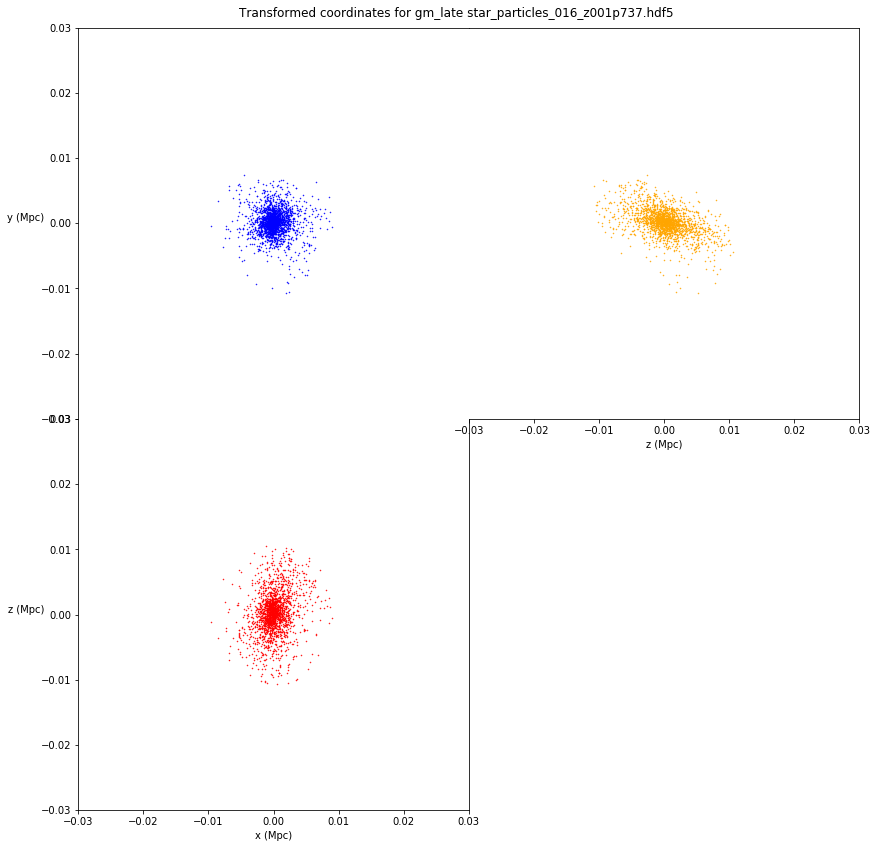

-------------------------------------------------


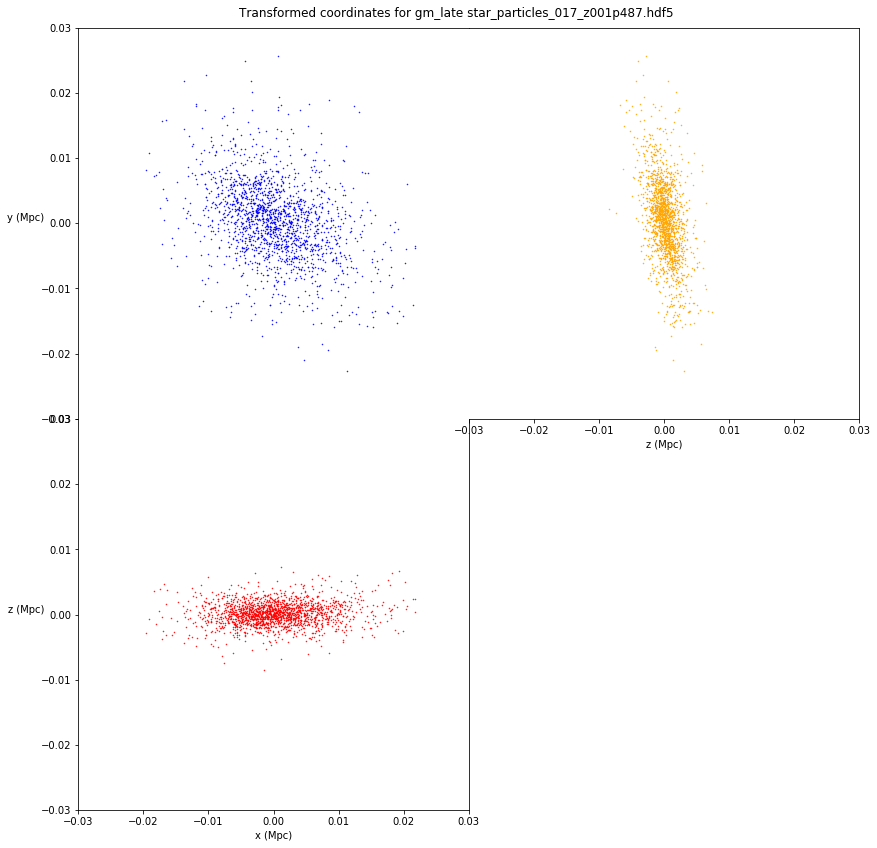

-------------------------------------------------


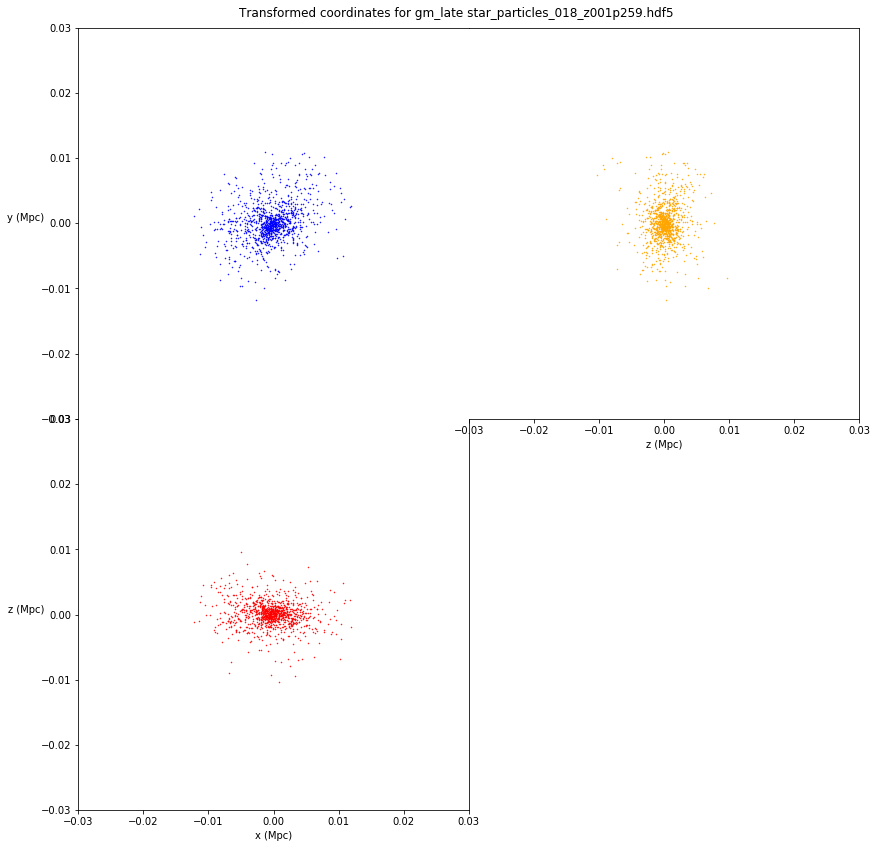

-------------------------------------------------


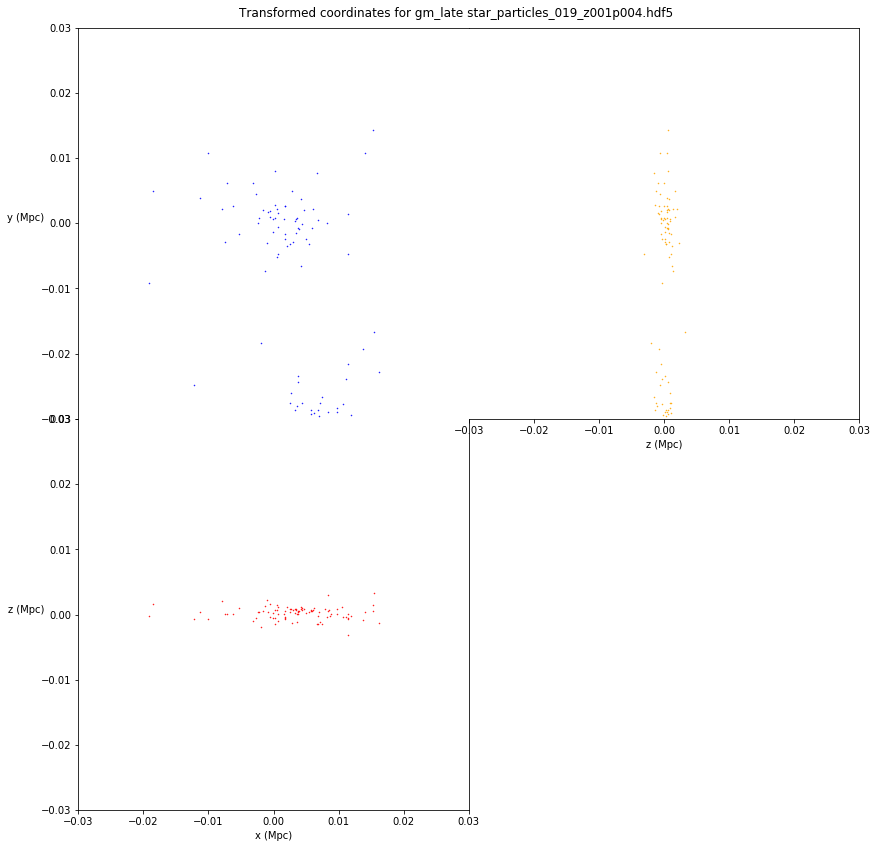

-------------------------------------------------


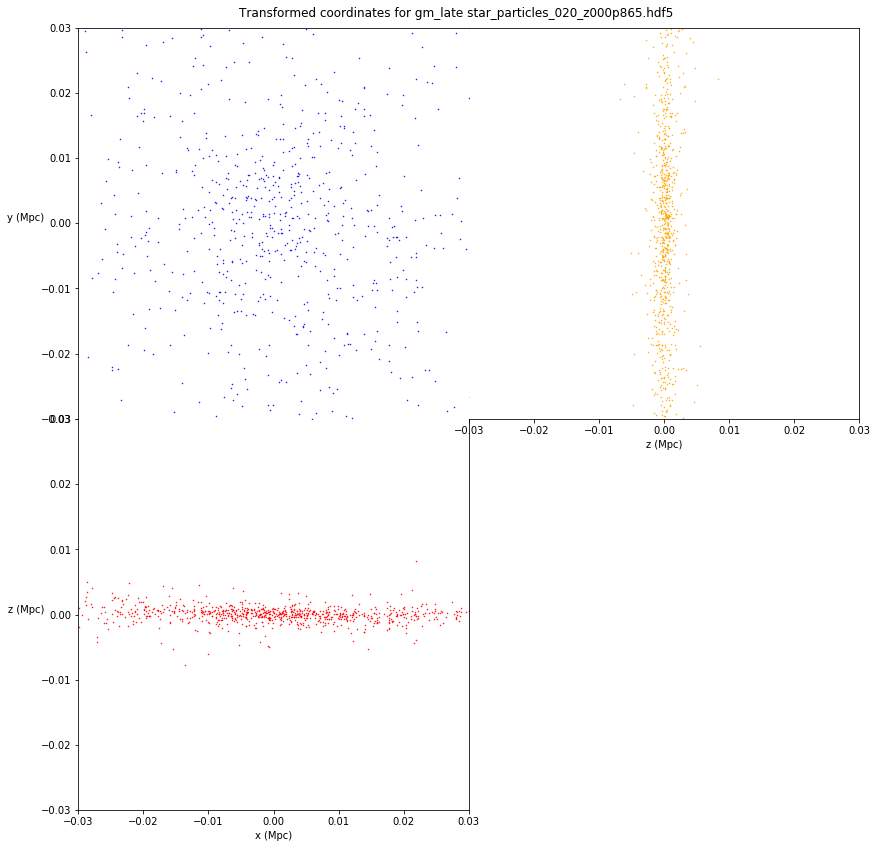

-------------------------------------------------


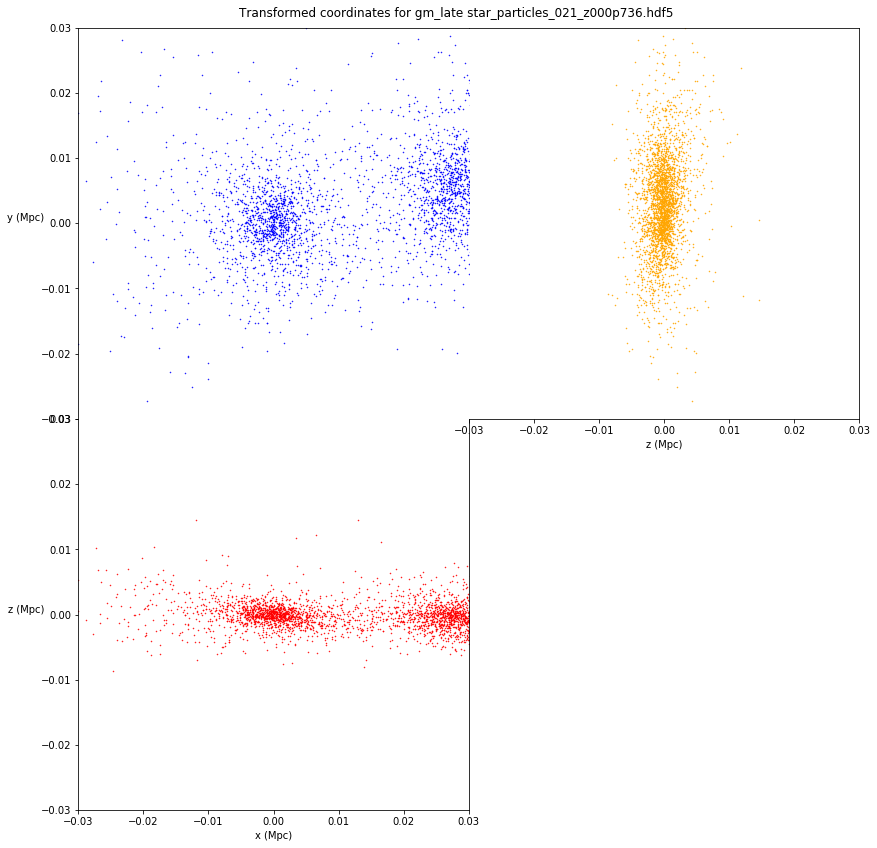

-------------------------------------------------


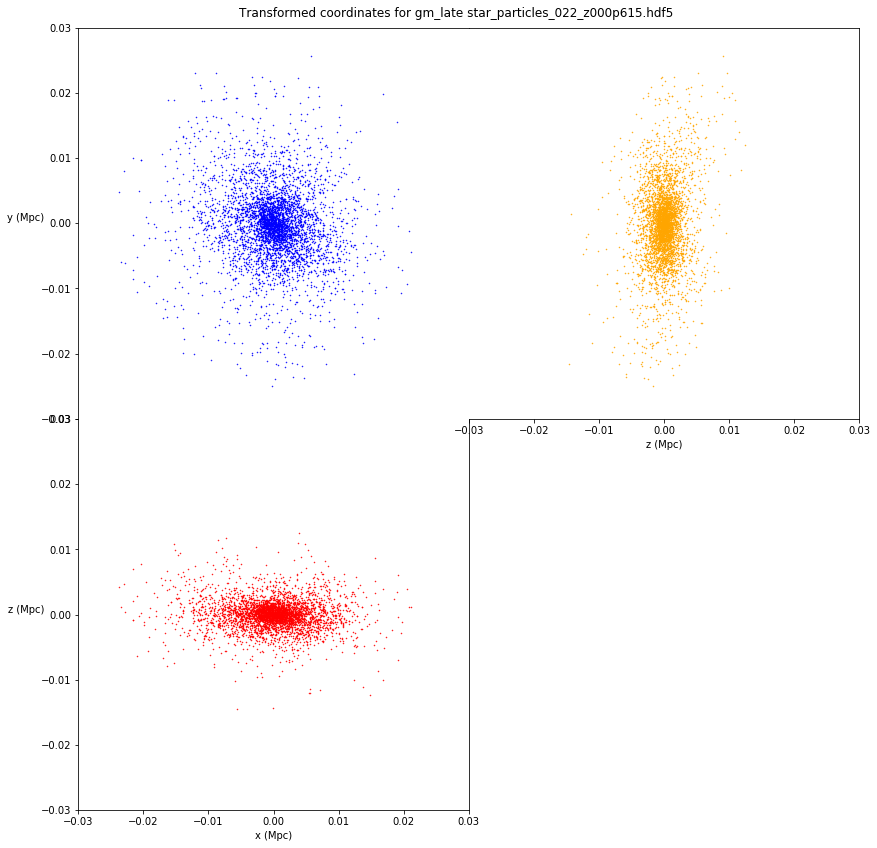

-------------------------------------------------


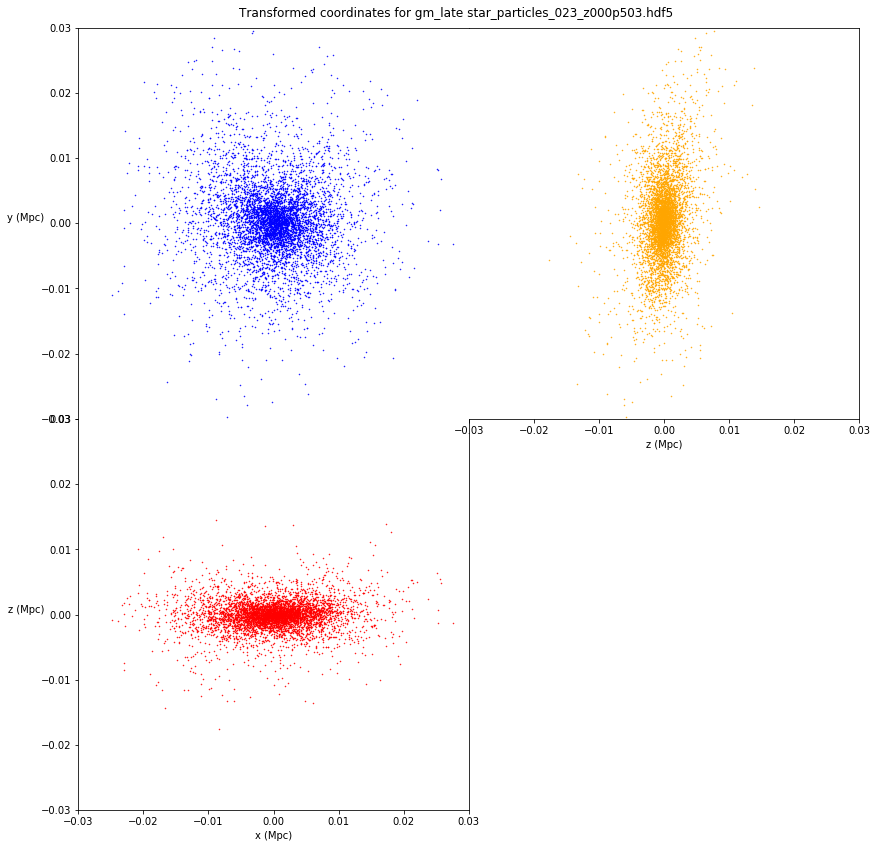

-------------------------------------------------


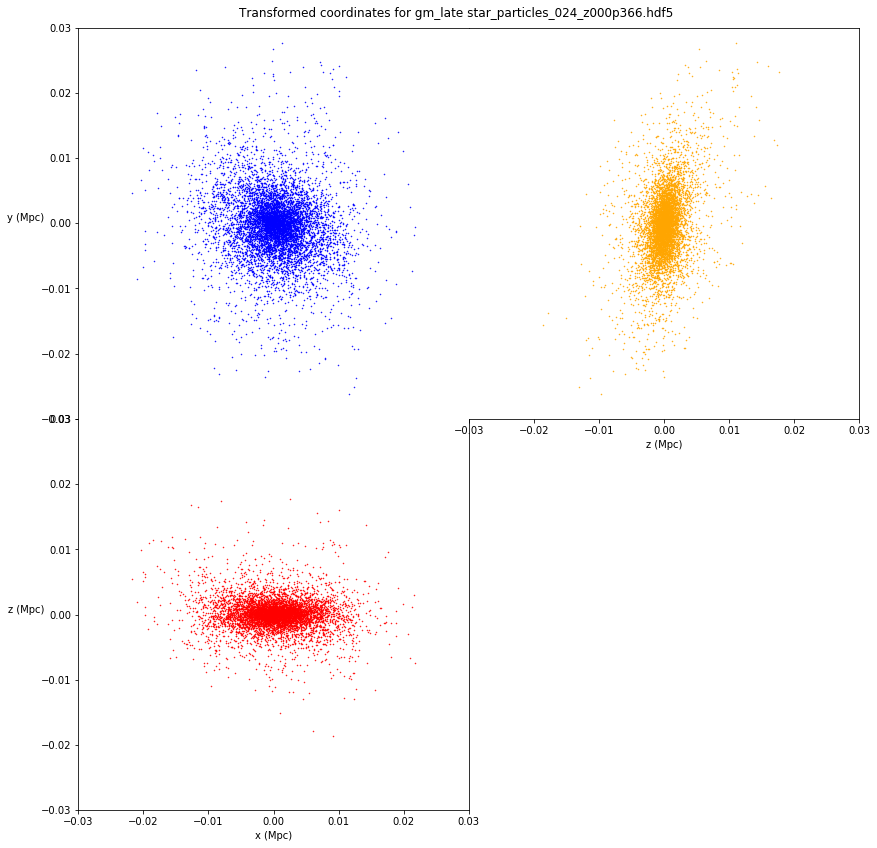

-------------------------------------------------


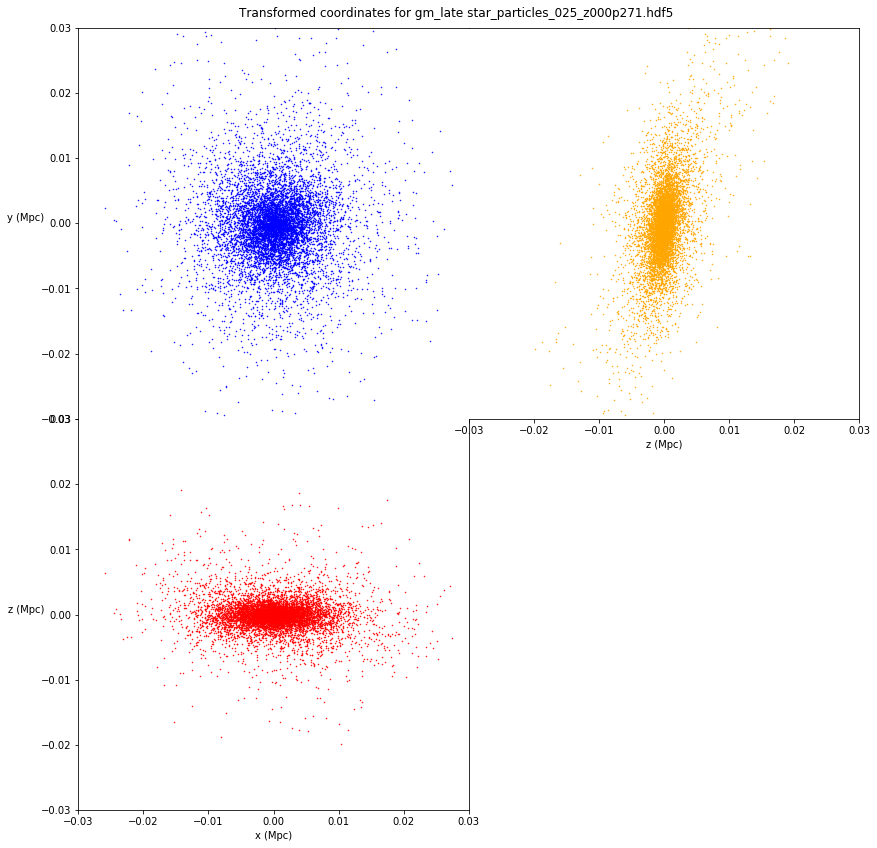

-------------------------------------------------


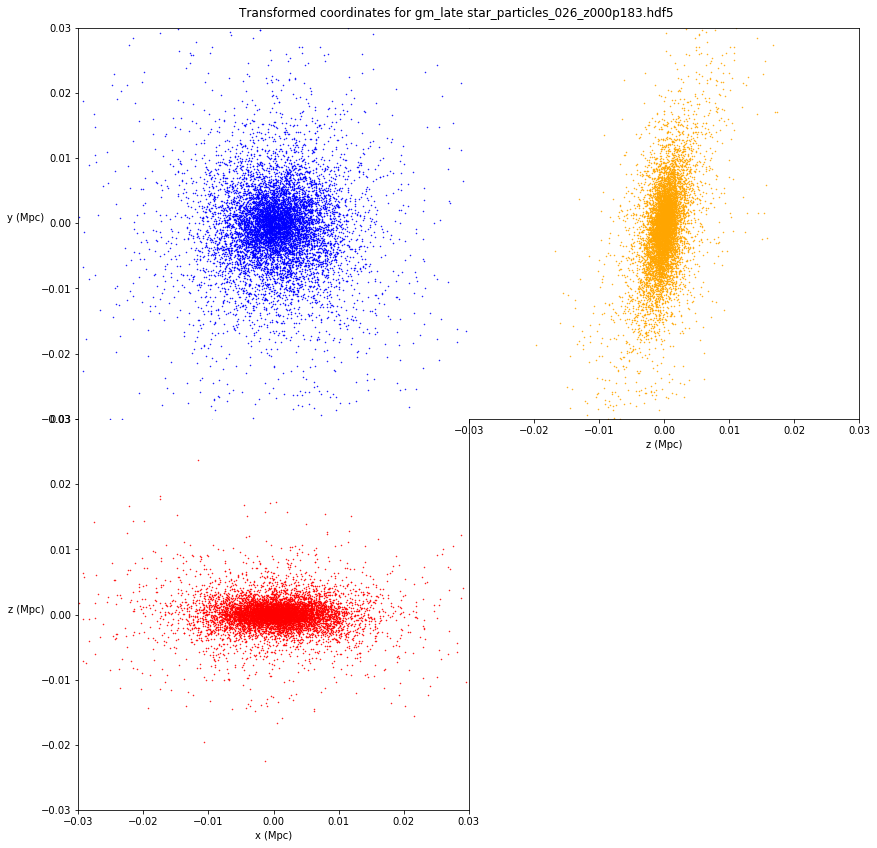

-------------------------------------------------


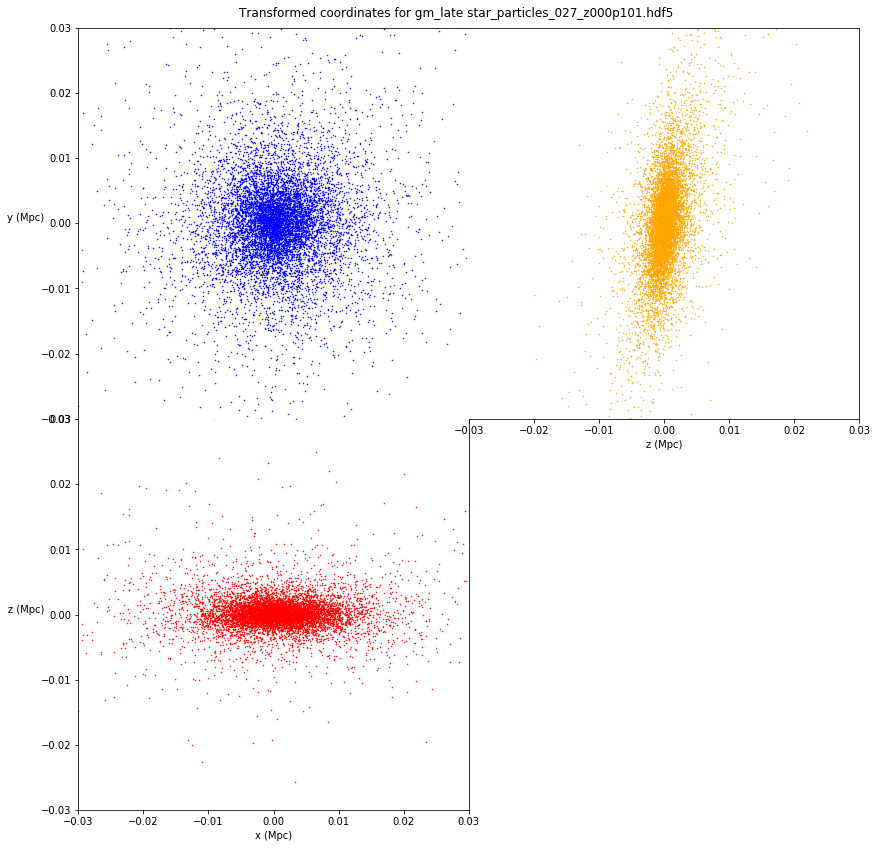

-------------------------------------------------


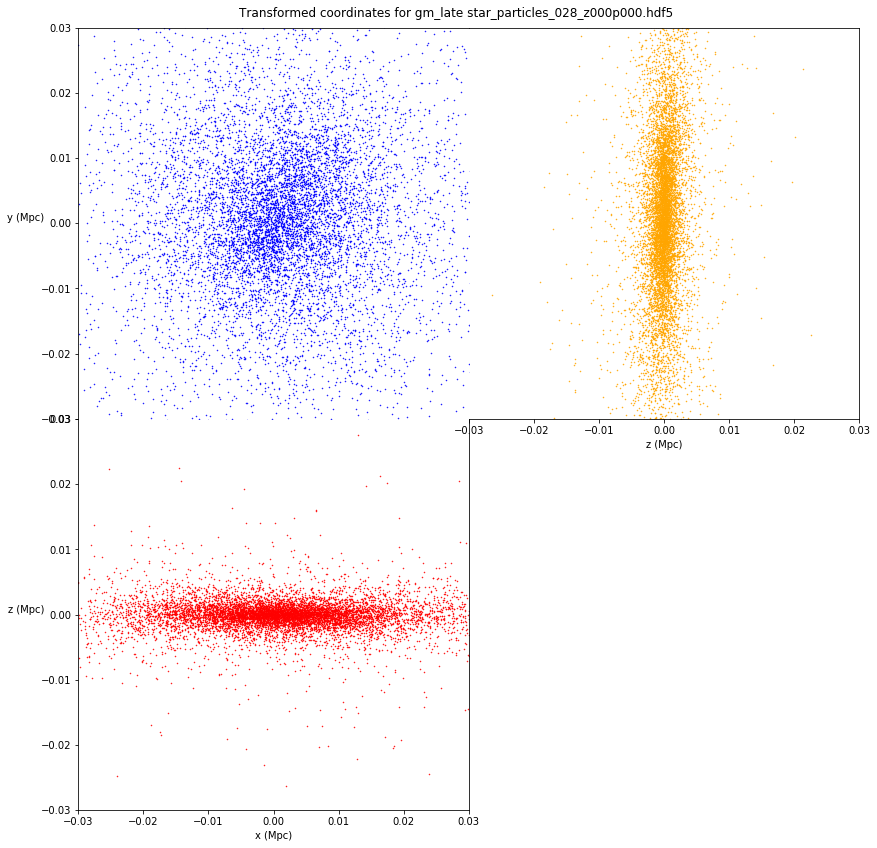

-----------------------------------------
gm_early
-----------------------------------------
-------------------------------------------------


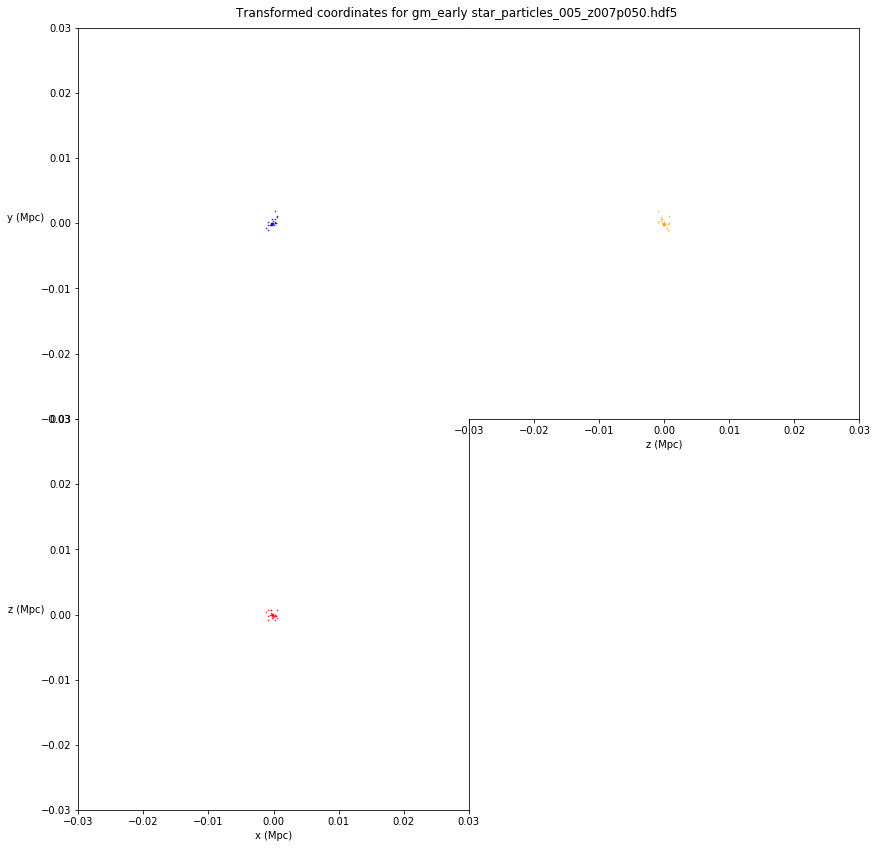

In [ ]:
import h5py
import matplotlib.pyplot as plt
import os
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import numpy as np
import re

axisScale = 0.03
datasets = ['organic', 'gm_late', 'gm_early']

for dataset in datasets:
    print('-----------------------------------------')
    print(dataset)
    print('-----------------------------------------')
    
    files = listdir('C:\\Users\\katha\\GalaxyMorphology\\' + dataset)
    os.path.join("/C:", "Users","katha","GalaxyMorphology", dataset)

    count = 0

    galaxyAm = np.array(range(96), dtype=float).reshape(24,4)
    
    for file in files:
    #if 1==1:



        #file = 'star_particles_015_z002p012.hdf5'
        #file = 'star_particles_028_z000p000.hdf5'
        
        # get redshift from the filename
        m = re.search('(z[0-9])\w+', file)
        s = m.group(0).replace('z', '')
        s = s.replace('p', '.')
        redshift = float(s)
        
        # load data for a particular galaxy at a particular redshift
        f = h5py.File('C:\\Users\\katha\\GalaxyMorphology\\' + dataset + '/' + file,'r')

        # extract data from the file
        ds_c = f['Coordinates']
        ds_v = f['Velocity']
        ds_m = f['Mass']
    

        # Calculate the resultant angular momentum vectors j
        # j contains the AM vectors for each particle per redshift era
        j = np.cross(ds_c, ds_v)
        specAngMom = np.transpose(np.multiply(ds_m, np.transpose(j)))
        specAngMomTot = np.sum(specAngMom, axis=0)/(np.sum(ds_m))
        specAngMomTotMag = np.linalg.norm(specAngMomTot)
        #print(np.shape(j))
        #print(np.shape(specAngMom))
        #print(np.shape(specAngMomTot))
        #print(np.shape(specAngMomTotMag))
        
       
        # Calculate the z unit vector
        unitVect_z = specAngMomTot / specAngMomTotMag
        #print (unitVect_z)
        #print (np.linalg.norm(unitVect_z))
        
        # Calculate x and y
        
        # the angular momentum's vector's (unitVect_z) direction is directly out of the plane of the galaxy
        # unitVect_z = k, but j = [-k2/k1, 1, 0], so
        
        k = unitVect_z
        #print ("k: ", k)
        
        j_ = [k[1]/k[0], 1, 0]
        #print ("j_: ", j_)
        
        i = np.cross(j_, unitVect_z)
        #print ("i: ", i)
        
        dsc_x_trsfrm = np.dot(ds_c, i)
        #print ("dsc_x_trsfrm", dsc_x_trsfrm)
        #print ("dsc_x_trsfrm shape", np.shape(dsc_x_trsfrm))
        
        dsc_y_trsfrm = np.dot(ds_c, j_)
        #print ("dsc_y_trsfrm", dsc_y_trsfrm)
        #print ("dsc_y_trsfrm shape", np.shape(dsc_y_trsfrm))
        
        dsc_z_trsfrm = np.dot(ds_c, k)
        #print ("dsc_z_trsfrm", dsc_z_trsfrm)
        #print ("dsc_z_trsfrm shape", np.shape(dsc_z_trsfrm))
        
        #dsc_trans = list(zip(dsc_x_trsfrm, dsc_y_trsfrm, dsc_z_trsfrm))
        dsc_trans = np.transpose(np.array([dsc_x_trsfrm, dsc_y_trsfrm, dsc_z_trsfrm]))
        
        #print ("dsc_trans", dsc_trans)
        #print ("dsc_trans shape", np.shape(dsc_trans))
        
        #print ("dsc_trans[0,x]")
        #print (dsc_trans[0,0])
        #print ("dsc_trans[0,y]")
        #print (dsc_trans[0,1])
        #print ("dsc_trans[0,z]")
        #print (dsc_trans[0,2])

        # Store totals of all particles for each redshift in the current galaxy
        #galaxyAm[count, 0] = redshift
        #galaxyAm[count, 1] = r[]
              
        count = count + 1
        print ('-------------------------------------------------')

    
    # print each angular momentum component's total per redshift
    #for n in range(24):
        #print('Galaxy "' + dataset + '" redshift: ' + str(galaxyAm[n][3]) + '\t total:  k1:' + str(galaxyAm[n][0]) + '\t k2:' + str(galaxyAm[n][1]) + '\t k3:' + str(galaxyAm[n][2]))
              
    #print ('length: ' + str(np.shape(galaxyAm)[0]))
    #plt.plot(galaxyAm[0:,3], galaxyAm[0:,2])
    #plt.plot(galaxyAm[0:,0], galaxyAm[0:,1])

    #plt.title('Galaxy: ' + dataset + ' - Magnitude of Angular Momentum vs. Redshift', pad=30)
    #plt.xlabel('Redshift')
    #plt.ylabel(r'L Magnitude ($M_\odot\ Mpc km s^{-1})$')
    #plt.ticklabel_format(axis='y', style='sci', useMathText=True)
    #plt.rcParams["figure.figsize"] = (12,10)
    #plt.semilogy()
    #plt.show()

        plt.figure(figsize = (14,14.39))
        plt.suptitle(('Transformed coordinates for ' + dataset + ' ' + file), y=0.9)


        #plt.legend()

        gs = gridspec.GridSpec(2,2)
        gs.update(wspace=0, hspace=0)

        ax1 = plt.subplot(gs[0])
        ax1.xaxis.set_visible(False)
        ax1.set_ylabel('y (Mpc)', rotation=0, labelpad=15)
        ax1.set_aspect('equal')
        ax1.spines['right'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_xlim(left=-axisScale, right=axisScale)
        ax1.set_ylim(bottom=-axisScale, top=axisScale)
        ax1.plot(dsc_x_trsfrm, dsc_y_trsfrm, '.', color='blue', markersize=1)




        ax2 = plt.subplot(gs[1])
        ax2.yaxis.set_visible(False)
        ax2.set_xlabel('z (Mpc)', rotation=0)
        ax2.set_aspect('equal')
        ax2.spines['left'].set_visible(False)
        ax2.set_xlim(left=-axisScale, right=axisScale)
        ax2.set_ylim(bottom=-axisScale, top=axisScale)
        ax2.plot(dsc_z_trsfrm, dsc_y_trsfrm, '.', color='orange', markersize=1)
        ax2.patch.set_alpha(0.0)



        ax3 = plt.subplot(gs[2])
        ax3.set_ylabel('z (Mpc)', rotation=0, labelpad=15)
        ax3.set_xlabel('x (Mpc)')
        ax3.set_aspect('equal')
        ax3.spines['top'].set_visible(False)
        ax3.set_xlim(left=-axisScale, right=axisScale)
        ax3.set_ylim(bottom=-axisScale, top=axisScale)
        ax3.plot(dsc_x_trsfrm, dsc_z_trsfrm, '.', color='red', markersize=1)
        nbins = len(ax1.get_xticklabels())
        #ax3.yaxis.set_major_locator(MaxNLocator(nbins=nbins, prune='upper'))
        ax3.patch.set_alpha(0.0)

        ax4 = plt.subplot(gs[3], visible=False)
        ax4.set_aspect('equal')


        #plt.savefig('C:\\Users\\katha\\GalaxyMorphology\\' + dataset + '\\plot' + ' ' + file + '.png', dpi=300)
        #plt.tight_layout()
        plt.show()
        count = count + 1
        